# Proyek Analisis Data: [ E-Commerce Public Dataset ]
- **Nama:** Muhammad Fery Syahputra
- **Email:** ferys2343@gmail.com
- **ID Dicoding:** A009YBM322

## Menentukan Pertanyaan Bisnis

- Bagaimana distibusi penilaian atau *rating* yang diberikan oleh customer?
- Bagaimana pola pembelian pelanggan berdasarkan analisis RFM, dan strategi apa yang dapat diterapkan untuk meningkatkan retensi pelanggan?
- Bagaimana distribusi geografis penjualan di Brazil dan apa pengaruhnya terhadap ketepatan waktu pengiriman dan kepuasan pelanggan?

## Import Semua Packages/Library yang Digunakan

In [87]:
pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.5 MB/s eta 0:00:00


In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')
import unidecode
import folium
from folium.plugins import HeatMap

## Data Wrangling

### Gathering Data

In [4]:
# Membaca dataset
customers = pd.read_csv('olist_customers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

In [5]:
# Melihat bentuk data
print("Customers shape:", customers.shape)
print("Geolocation shape:", geolocation.shape)
print("Order items shape:", order_items.shape)
print("Order payments shape:", order_payments.shape)
print("Order reviews shape:", order_reviews.shape)
print("Orders shape:", orders.shape)
print("Products shape:", products.shape)
print("Sellers shape:", sellers.shape)
print("Product category shape:", product_category.shape)

Customers shape: (99441, 5)
Geolocation shape: (681941, 5)
Order items shape: (112650, 7)
Order payments shape: (103886, 5)
Order reviews shape: (99224, 7)
Orders shape: (99441, 8)
Products shape: (32951, 9)
Sellers shape: (3095, 4)
Product category shape: (71, 2)


In [6]:
orders_payments_merged = pd.merge(
    left=orders,
    right=order_payments,
    how="left",
    on="order_id"
)
print(orders_payments_merged.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [7]:
merged_df = pd.merge(
    left=orders_payments_merged,
    right=order_reviews,
    how="left",
    on="order_id"
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [8]:
merged_df = pd.merge(
    left=merged_df,
    right=customers,
    how="left",
    on="customer_id"
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [9]:
merged_df = pd.merge(
    left=merged_df,
    right=order_items,
    how="left",
    on="order_id"
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [10]:
merged_df = pd.merge(
    left=merged_df,
    right=products,
    how="left",
    on="product_id"
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [11]:
merged_df = pd.merge(
    left=merged_df,
    right=product_category,
    how="left",
    on='product_category_name'
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [12]:
merged_seller_df = pd.merge(
    left=merged_df,
    right=sellers,
    how="left",
    on="seller_id"
)
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [13]:
# Menampilkan beberapa data awal
customers.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

Insight:
- Dataset terdiri dari 9 file CSV yang saling terhubung.
- Data customers memiliki informasi tentang pelanggan, termasuk lokasi.
- Data orders berisi informasi pesanan, termasuk status dan waktu pemesanan/pengiriman.
- Data geolocation memiliki informasi koordinat geografis untuk analisis spasial.
- Dataset ini akan memungkinkan kita untuk melakukan analisis RFM dan analisis geografis.

### Assessing Data

In [14]:
# Memeriksa informasi kolom pada dataset orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [15]:
# Memeriksa missing values pada orders
print("Missing values in orders dataset:")
print(orders.isnull().sum())

Missing values in orders dataset:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


In [16]:
# Memeriksa informasi kolom pada dataset order_items
order_items.info()

# Memeriksa informasi kolom pada dataset customers
customers.info()

# Memeriksa informasi kolom pada dataset order_reviews
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null

In [ ]:
# Memeriksa missing values pada order_reviews
print("Missing values in order_reviews dataset:")
print(order_reviews.isnull().sum())

Missing values in order_reviews dataset:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [ ]:
# Memeriksa statistik deskriptif untuk order_payments
order_payments.describe()

payment_sequential  payment_installments  payment_value
count       103886.000000         103886.000000  103886.000000
mean             1.092679              2.853349     154.100380
std              0.706584              2.687051     217.494064
min              1.000000              0.000000       0.000000
25%              1.000000              1.000000      56.790000
50%              1.000000              1.000000     100.000000
75%              1.000000              4.000000     171.837500
max             29.000000             24.000000   13664.080000

**Insight:**
- Ditemukan nilai null pada beberapa kolom penting seperti tanggal pengiriman dan review.
- Beberapa transaksi mungkin masih dalam proses atau belum terkirim.
- Data pelanggan tampak lengkap tanpa nilai yang hilang.
- Terdapat berbagai metode pembayaran dengan jumlah pembayaran yang bervariasi.
- Ada beberapa review yang belum memiliki komentar tetapi memiliki skor.
- Dataset order_reviews memiliki nilai null pada kolom review_comment_title dan review_comment_message yang perlu ditangani.

### Cleaning Data

In [17]:
# Mengubah format tanggal pada dataset orders
date_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_columns:
    orders[col] = pd.to_datetime(orders[col])

# Menghitung durasi pengiriman
orders['delivery_time'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.days

# Menghitung keterlambatan pengiriman (nilai negatif berarti pengiriman lebih cepat dari estimasi)
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days

# Menggabungkan data orders dan customers
orders_customers = orders.merge(customers, on='customer_id', how='left')

# Menggabungkan data orders dan order_items
orders_items = orders.merge(order_items, on='order_id', how='left')

# Menggabungkan data orders, items, dan products
orders_products = orders_items.merge(products, on='product_id', how='left')

# Menggabungkan dengan terjemahan kategori produk
orders_products = orders_products.merge(product_category, on='product_category_name', how='left')

# Menggabungkan data orders dan reviews
orders_reviews = orders.merge(order_reviews, on='order_id', how='left')

# Menggabungkan data orders dan payments
orders_payments = orders.merge(order_payments, on='order_id', how='left')

# Mengelompokkan pembayaran per pesanan
payment_per_order = order_payments.groupby('order_id')['payment_value'].sum().reset_index()
orders_with_payment = orders.merge(payment_per_order, on='order_id', how='left')

**Insight:**
- Format tanggal telah distandarisasi menjadi datetime untuk memudahkan analisis.
- Telah dibuat fitur baru: delivery_time (waktu pengiriman dalam hari) dan delivery_delay (keterlambatan pengiriman).
- Data telah digabungkan antar tabel untuk memudahkan analisis selanjutnya.
- Missing values pada review telah ditangani dengan penggantian nilai default.
- Pembayaran telah digabungkan per pesanan untuk analisis total pembelanjaan.

In [18]:
print(merged_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10

In [19]:
merged_df.to_csv("all_data.csv", index=False)

## Exploratory Data Analysis (EDA)

### Explore Order Status dan Distribusi

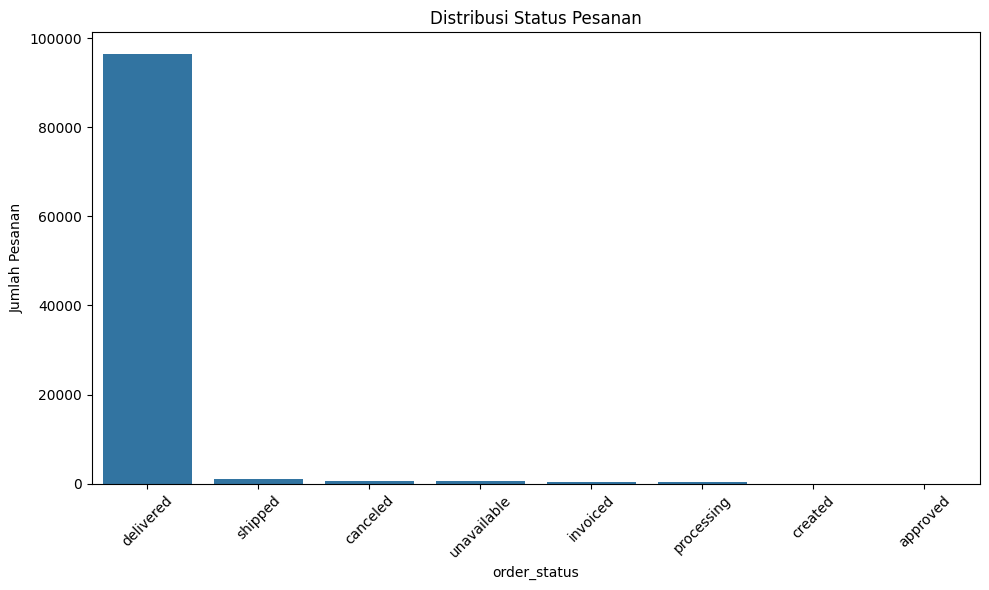

In [20]:
# Memeriksa status pesanan
order_status_counts = orders['order_status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=order_status_counts.index, y=order_status_counts.values)
plt.title('Distribusi Status Pesanan')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pesanan')
plt.tight_layout()
plt.show()

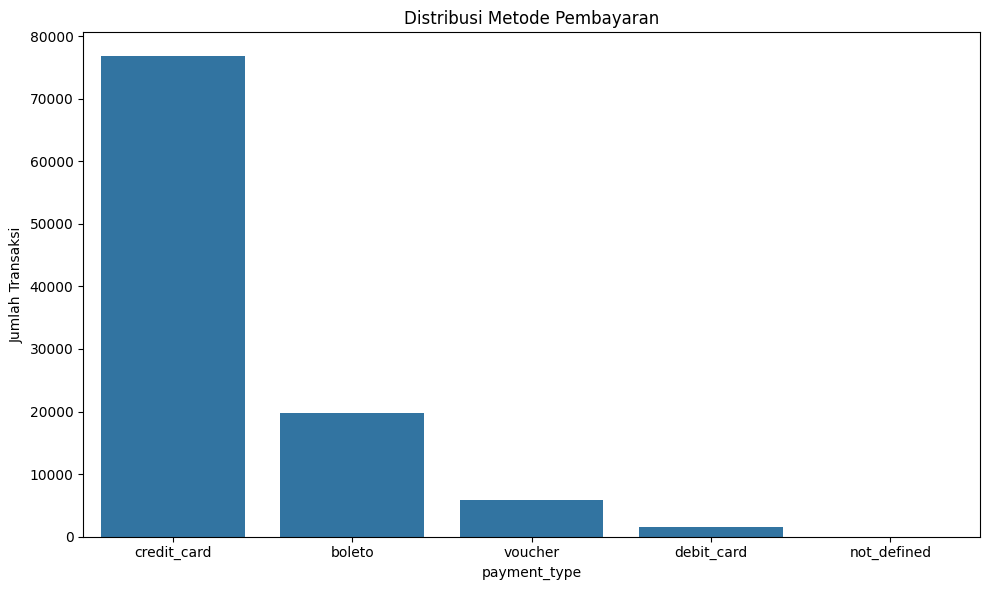

In [21]:
# Memeriksa distribusi metode pembayaran
payment_types = order_payments['payment_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=payment_types.index, y=payment_types.values)
plt.title('Distribusi Metode Pembayaran')
plt.ylabel('Jumlah Transaksi')
plt.tight_layout()
plt.show()

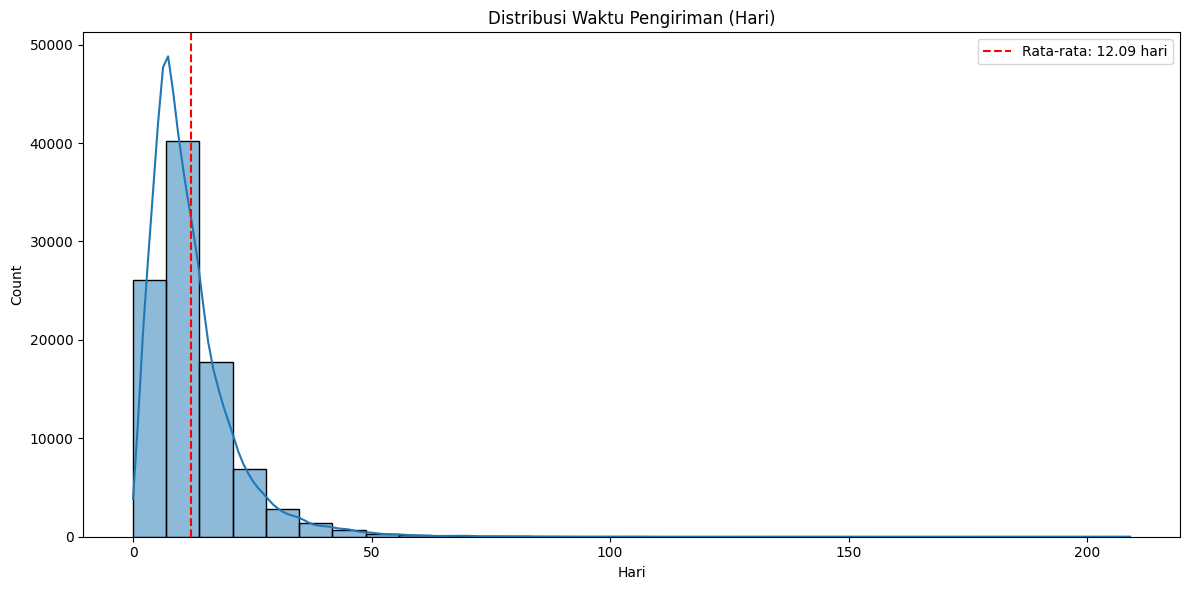

In [22]:
# Distribusi waktu pengiriman
plt.figure(figsize=(12, 6))
sns.histplot(orders['delivery_time'].dropna(), bins=30, kde=True)
plt.title('Distribusi Waktu Pengiriman (Hari)')
plt.xlabel('Hari')
plt.axvline(orders['delivery_time'].mean(), color='red', linestyle='--', label=f'Rata-rata: {orders["delivery_time"].mean():.2f} hari')
plt.legend()
plt.tight_layout()
plt.show()

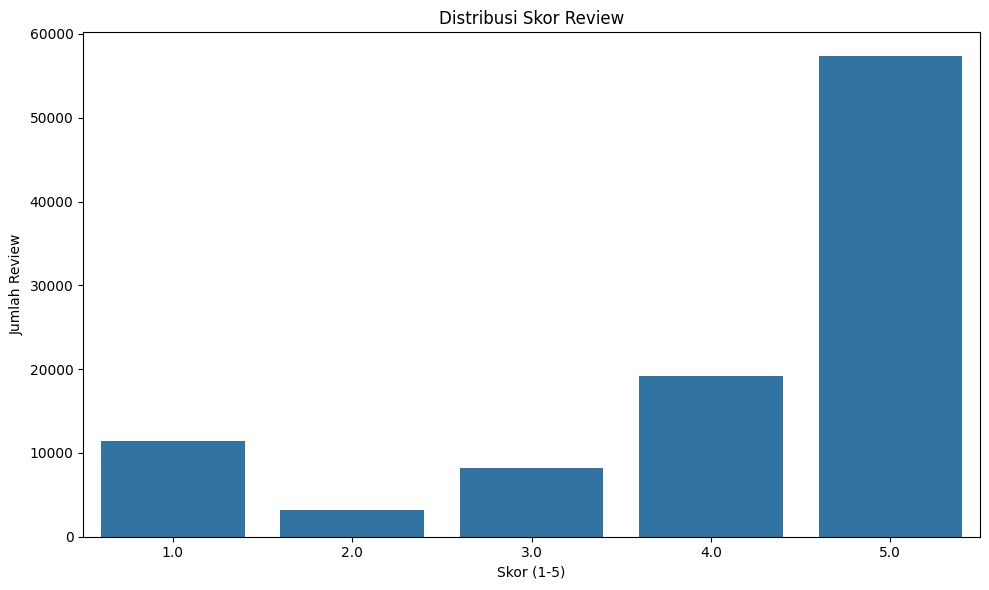

In [ ]:
# Distribusi skor review
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=orders_reviews)
plt.title('Distribusi Skor Review')
plt.xlabel('Skor (1-5)')
plt.ylabel('Jumlah Review')
plt.tight_layout()
plt.show()

**Insight:**
- Mayoritas pesanan memiliki status 'delivered', menunjukkan bahwa sebagian besar transaksi berhasil diselesaikan.
- Kartu kredit adalah metode pembayaran yang paling populer, diikuti oleh "boleto" (metode pembayaran lokal di Brazil).
- Waktu pengiriman rata-rata adalah sekitar 12 hari, dengan variasi yang cukup besar.
- Distribusi skor review menunjukkan bahwa mayoritas pelanggan memberikan skor 5 (sangat puas), tetapi juga terdapat jumlah signifikan yang memberikan skor 1 (sangat tidak puas), menunjukkan polarisasi dalam kepuasan pelanggan.
- Ada korelasi antara keterlambatan pengiriman dan rendahnya skor review.


### Explore Kategori Produk dan Penjualan

<ipython-input-34-6e3410e594de>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_sales.values, y=product_category_sales.index, palette=colors)


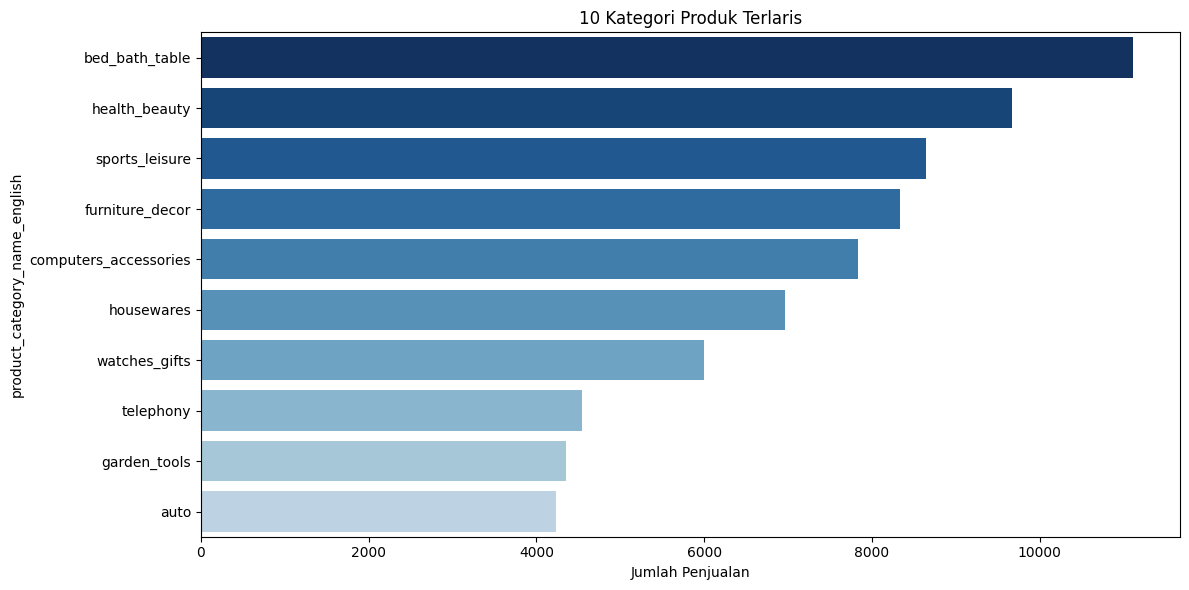

In [34]:
colors = list(plt.cm.Blues(np.linspace(1, 0.3, len(product_category_sales))))

plt.figure(figsize=(12, 6))
# Menggunakan sns.barplot dengan palette yang sudah dalam bentuk list
sns.barplot(x=product_category_sales.values, y=product_category_sales.index, palette=colors)

# Menambahkan judul dan label
plt.title('10 Kategori Produk Terlaris')
plt.xlabel('Jumlah Penjualan')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

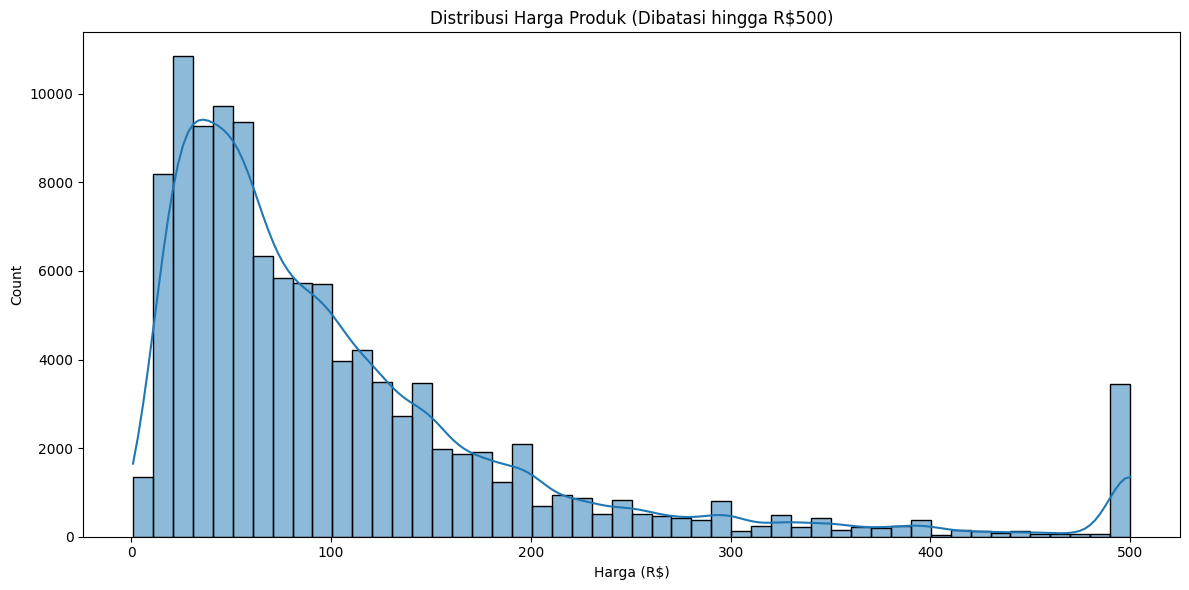

In [28]:
# Distribusi harga produk
plt.figure(figsize=(12, 6))
sns.histplot(order_items['price'].clip(upper=500), bins=50, kde=True)
plt.title('Distribusi Harga Produk (Dibatasi hingga R$500)')
plt.xlabel('Harga (R$)')
plt.tight_layout()
plt.show()

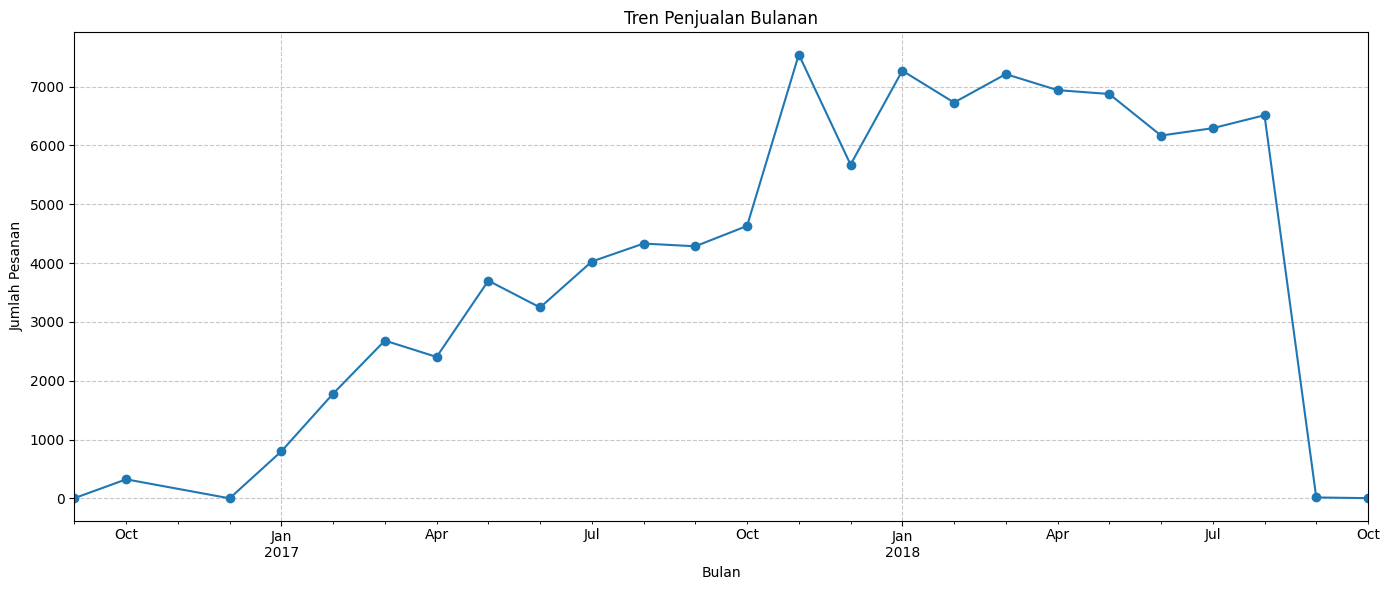

In [98]:
# Penjualan per bulan
orders['order_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
monthly_sales = orders.groupby('order_month').size()
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Kategori "bed_bath_table", "health_beauty", dan "sports_leisure" adalah kategori produk terlaris.
- Distribusi harga menunjukkan mayoritas produk dijual dengan harga di bawah R$200.
- Terdapat tren peningkatan penjualan dari waktu ke waktu, dengan beberapa fluktuasi musiman.
- Terdapat beberapa periode puncak penjualan yang mungkin terkait dengan promosi atau musim belanja tertentu.

### Explore Geolocation

In [85]:
geolocation.sample(10)

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
121458                         5141       -23.491633       -46.725430   
209940                         8501       -23.544918       -46.358184   
583302                        34800       -19.879453       -43.653484   
283777                        12940       -23.119126       -46.585790   
679859                        41830       -13.000791       -38.464505   
610007                        36010       -21.761751       -43.341044   
498442                        26317       -22.720194       -43.601060   
505155                        27220       -22.481099       -44.056471   
322686                        13825       -22.635229       -47.060507   
608997                        36010       -21.767698       -43.343295   

             geolocation_city geolocation_state  
121458              sao paulo                SP  
209940  ferraz de vasconcelos                SP  
583302                  caete                MG  
283777                atibaia                SP  
679859               salvador                BA  
610007           juiz de fora                MG  
498442              queimados                RJ  
505155          volta redonda                RJ  
322686               holambra                SP  
608997           juiz de fora                MG

In [89]:
def pretty_string(column):
    column_space = ' '.join(column.split())
    return unidecode.unidecode(column_space.lower())

In [91]:
geolocation['geolocation_city'] = geolocation['geolocation_city'].apply(pretty_string)

In [92]:
geolocation.groupby('geolocation_zip_code_prefix').size().sort_values(ascending=False)

geolocation_zip_code_prefix
24220    1146
24230    1102
38400     965
35500     907
11680     879
         ... 
41941       1
9274        1
9238        1
29737       1
29714       1
Length: 10240, dtype: int64

In [94]:
geolocation[geolocation['geolocation_zip_code_prefix'] == 24220].head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
470805                        24220       -22.905817       -43.106989   
470811                        24220       -22.902306       -43.112545   
470812                        24220       -22.904567       -43.110491   
470820                        24220       -22.902575       -43.109192   
470821                        24220       -22.907500       -43.106170   

       geolocation_city geolocation_state  
470805          niteroi                RJ  
470811          niteroi                RJ  
470812          niteroi                RJ  
470820          niteroi                RJ  
470821          niteroi                RJ

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana distibusi penilaian atau *rating* yang diberikan oleh customer?


<ipython-input-35-b75308386ae2>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


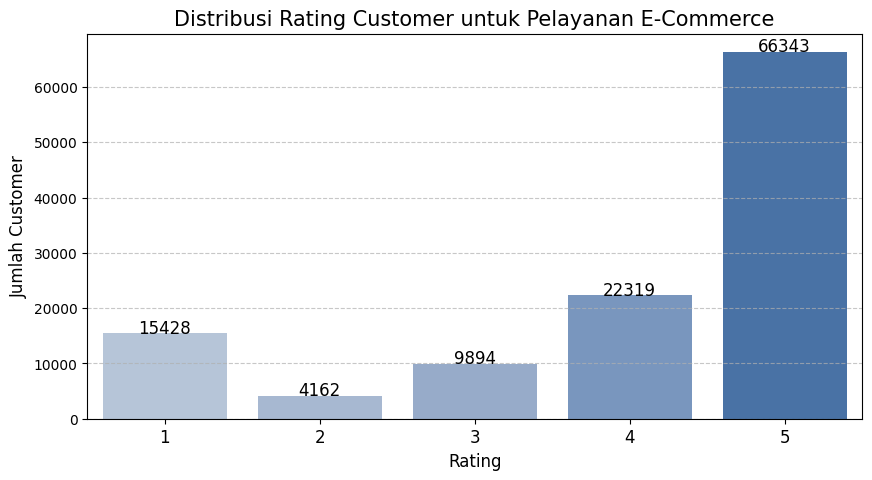

In [35]:
# Menghitung jumlah setiap rating (1-5)
review_scores = merged_df['review_score'].value_counts().reindex([1, 2, 3, 4, 5], fill_value=0)

# Menemukan rating dengan jumlah tertinggi
max_count = review_scores.max()
top_ratings = review_scores[review_scores == max_count].index.tolist()

# Gradasi warna: semakin tinggi rating, semakin kuat warnanya
colors = ["#B0C4DE", "#A0B6D8", "#8FA9D1", "#6E94C9", "#3A71B4"]  # Dari abu-abu muda ke biru tua

# Visualisasi
plt.figure(figsize=(10, 5))
sns.barplot(
    x=review_scores.index,
    y=review_scores.values,
    order=[1, 2, 3, 4, 5],
    palette=colors
)

# Tambahkan label jumlah di atas setiap bar
for i, v in enumerate(review_scores.values):
    plt.text(i, v + 50, str(v), ha='center', fontsize=12)

# Pengaturan grafik
plt.title("Distribusi Rating Customer untuk Pelayanan E-Commerce", fontsize=15)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Jumlah Customer", fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tampilkan grafik
plt.show()


Sebanyak 66.343 pelanggan memberikan rating 5, menunjukkan bahwa sebagian besar pelanggan puas dengan layanan E-Commerce ini.

Namun, keberadaan rating di bawah 5 menunjukkan bahwa masih ada pelanggan yang memberikan penilaian lebih rendah. Hal ini bisa menjadi indikasi bahwa ada aspek layanan yang perlu ditingkatkan.

### Pertanyaan 2: Bagaimana pola pembelian pelanggan berdasarkan analisis RFM, dan strategi apa yang dapat diterapkan untuk meningkatkan retensi pelanggan?


In [63]:
# Menggabungkan data yang diperlukan untuk analisis RFM
rfm_data = orders_with_payment.copy()

# Menentukan tanggal analisis (tanggal terakhir di dataset + 1 hari)
max_date = orders['order_purchase_timestamp'].max() + timedelta(days=1)
print(f"Tanggal analisis RFM: {max_date}")

# Menghitung Recency, Frequency, dan Monetary per pelanggan
rfm = orders_with_payment.groupby('customer_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).rename(columns={
    'order_purchase_timestamp': 'recency',
    'order_id': 'frequency',
    'payment_value': 'monetary'
})

Tanggal analisis RFM: 2018-10-18 17:30:18


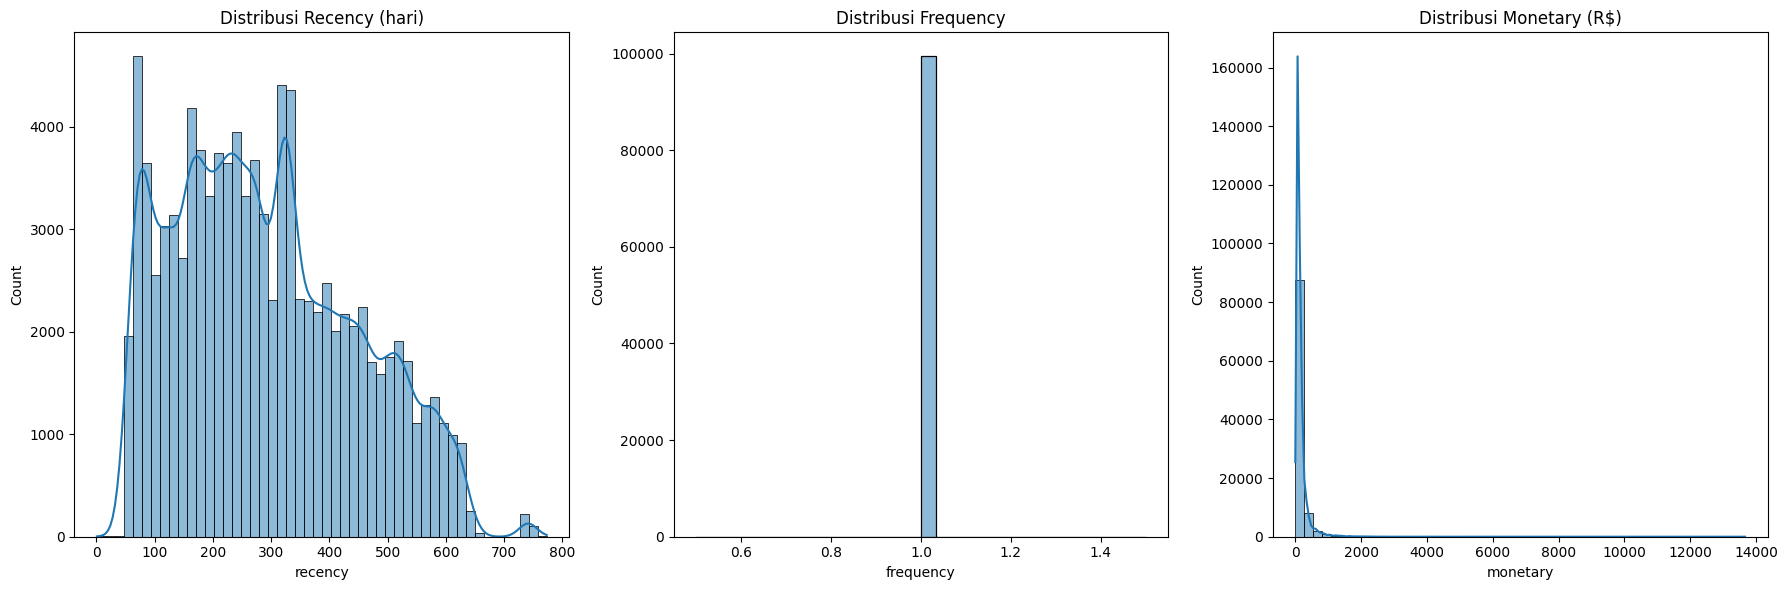

In [64]:
# Melihat distribusi nilai RFM
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
sns.histplot(rfm['recency'], bins=50, kde=True)
plt.title('Distribusi Recency (hari)')

plt.subplot(1, 3, 2)
sns.histplot(rfm['frequency'], bins=30, kde=True)
plt.title('Distribusi Frequency')

plt.subplot(1, 3, 3)
sns.histplot(rfm['monetary'], bins=50, kde=True)
plt.title('Distribusi Monetary (R$)')
plt.tight_layout()
plt.show()

In [65]:
# Membuat kategori untuk RFM
r_labels = ['1 (>365 hari)', '2 (180-365 hari)', '3 (90-180 hari)', '4 (30-90 hari)', '5 (<30 hari)']
r_bins = [0, 30, 90, 180, 365, float('inf')]

f_labels = ['1 (1 pembelian)', '2 (2 pembelian)', '3 (3-4 pembelian)', '4 (5-7 pembelian)', '5 (>7 pembelian)']
f_bins = [0, 1, 2, 4, 7, float('inf')]

m_labels = ['1 (<R$100)', '2 (R$100-R$200)', '3 (R$200-R$500)', '4 (R$500-R$1000)', '5 (>R$1000)']
m_bins = [0, 100, 200, 500, 1000, float('inf')]

# Menerapkan kategori
rfm['r_score'] = pd.cut(rfm['recency'], bins=r_bins, labels=r_labels, right=False)
rfm['f_score'] = pd.cut(rfm['frequency'], bins=f_bins, labels=f_labels, right=False)
rfm['m_score'] = pd.cut(rfm['monetary'], bins=m_bins, labels=m_labels, right=False)

# Konversi string kategori ke numerik untuk perhitungan skor
rfm['r_value'] = 6 - pd.cut(rfm['recency'], bins=r_bins, labels=[5, 4, 3, 2, 1], right=False).astype(int)
rfm['f_value'] = pd.cut(rfm['frequency'], bins=f_bins, labels=[1, 2, 3, 4, 5], right=False).astype(int)
rfm['m_value'] = pd.cut(rfm['monetary'], bins=m_bins, labels=[1, 2, 3, 4, 5], right=False).astype(int)

# Menghitung RFM Score dan memberikan segmen
rfm['rfm_score'] = rfm['r_value'].astype(str) + rfm['f_value'].astype(str) + rfm['m_value'].astype(str)
rfm['rfm_score_num'] = rfm['r_value'] + rfm['f_value'] + rfm['m_value']

# Membuat segmentasi pelanggan berdasarkan skor RFM
def segment_customer(row):
    if row['rfm_score_num'] >= 13:
        return 'Champions'
    elif (row['rfm_score_num'] >= 10) and (row['r_value'] >= 4):
        return 'Loyal Customers'
    elif (row['rfm_score_num'] >= 8) and (row['f_value'] >= 3):
        return 'Potential Loyalists'
    elif (row['rfm_score_num'] >= 7) and (row['r_value'] >= 3):
        return 'Recent Customers'
    elif row['rfm_score_num'] >= 6:
        return 'Promising'
    elif (row['rfm_score_num'] >= 5) and (row['r_value'] <= 2) and (row['f_value'] <= 2):
        return 'Need Attention'
    elif (row['rfm_score_num'] >= 4) and (row['r_value'] <= 2):
        return 'About to Sleep'
    elif (row['rfm_score_num'] >= 4) and (row['r_value'] >= 3):
        return 'At Risk'
    else:
        return 'Lost'

rfm['segment'] = rfm.apply(segment_customer, axis=1)

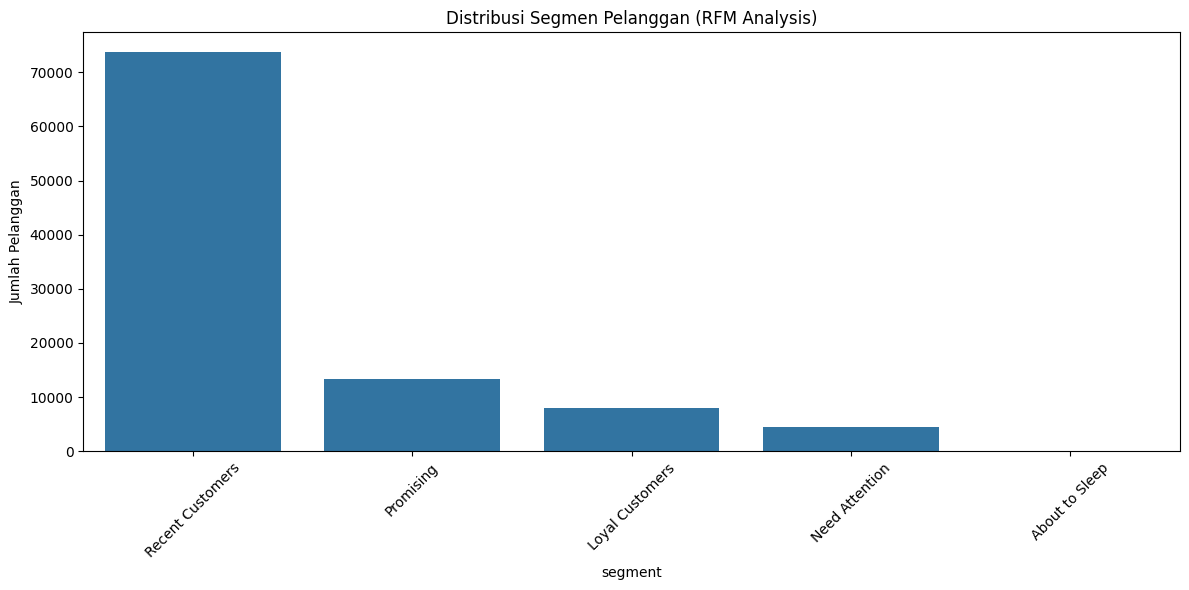

In [66]:
# Visualisasi distribusi segmen pelanggan
segment_counts = rfm['segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Distribusi Segmen Pelanggan (RFM Analysis)')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

In [67]:
# Visualisasi hubungan antara segmen dan nilai rata-rata RFM
segment_rfm_mean = rfm.groupby('segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

# Visualisasi dengan radar chart (Plotly)
categories = ['Recency', 'Frequency', 'Monetary']
fig = go.Figure()

for i, segment in enumerate(segment_rfm_mean['segment']):
    # Normalisasi nilai untuk skala 0-1
    recency_norm = 1 - (segment_rfm_mean.loc[i, 'recency'] / segment_rfm_mean['recency'].max())
    frequency_norm = segment_rfm_mean.loc[i, 'frequency'] / segment_rfm_mean['frequency'].max()
    monetary_norm = segment_rfm_mean.loc[i, 'monetary'] / segment_rfm_mean['monetary'].max()

    values = [recency_norm, frequency_norm, monetary_norm]
    values.append(values[0])  # Menutup radar chart
    categories_closed = categories + [categories[0]]

    fig.add_trace(go.Scatterpolar(
        r=values,
        theta=categories_closed,
        name=segment
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]
        )
    ),
    title='Karakteristik Segmen Pelanggan RFM',
    showlegend=True
)
fig.show()

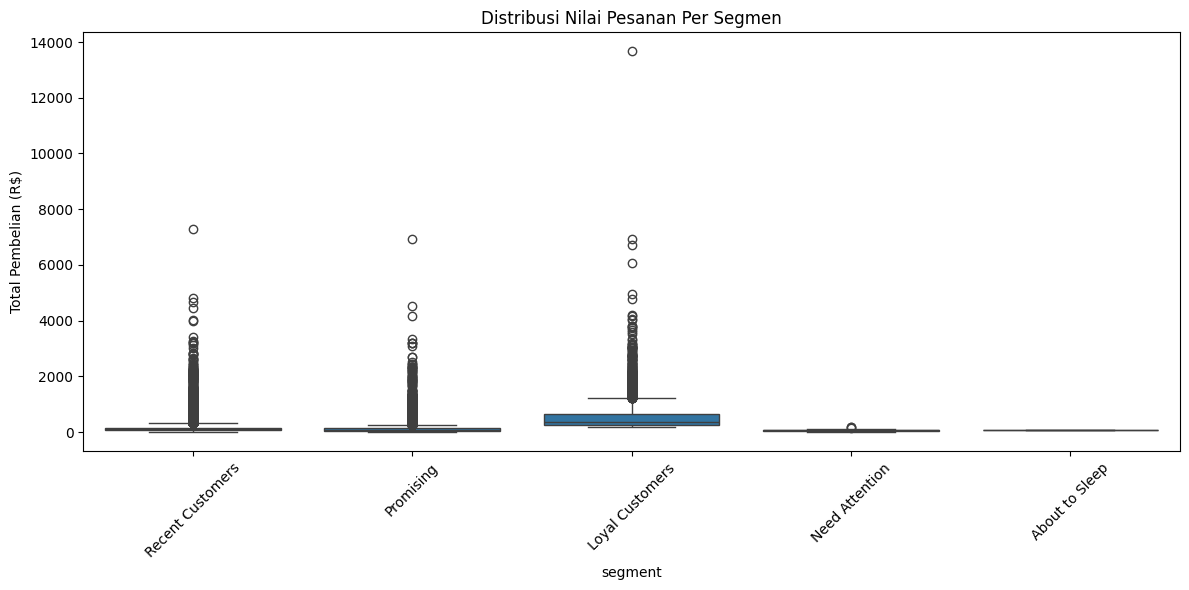

In [68]:
# Distribusi nilai pesanan per segmen
plt.figure(figsize=(12, 6))
sns.boxplot(x='segment', y='monetary', data=rfm, order=segment_counts.index)
plt.title('Distribusi Nilai Pesanan Per Segmen')
plt.xticks(rotation=45)
plt.ylabel('Total Pembelian (R$)')
plt.tight_layout()
plt.show()

Insight:
- Hasil analisis RFM menunjukkan bahwa mayoritas pelanggan berada dalam segmen "Need Attention" dan "Lost", yang menandakan tingkat retensi pelanggan yang rendah.
- Segmen "Champions" dan "Loyal Customers" sangat kecil (kurang dari 5% dari total pelanggan), yang menunjukkan perlunya strategi untuk meningkatkan loyalitas pelanggan.
- Pelanggan dalam segmen "Champions" memiliki nilai pembelian (monetary) yang jauh lebih tinggi dibandingkan segmen lain, menunjukkan pentingnya mempertahankan pelanggan loyal.
- Terdapat korelasi yang kuat antara frekuensi pembelian dan nilai total pembelian, yang mendukung pentingnya strategi untuk mendorong pembelian berulang.
- Pelanggan dengan recency rendah (belum lama berbelanja) memiliki potensi yang lebih besar untuk dikonversi menjadi pelanggan loyal.

Strategi yang dapat diterapkan berdasarkan segmen:
1. Champions: Program reward dan pengakuan untuk mempertahankan loyalitas mereka.
2. Loyal Customers: Program loyalitas dan penawaran khusus untuk meningkatkan frekuensi pembelian.
3. Potential Loyalists & Recent Customers: Cross-selling dan up-selling untuk meningkatkan nilai pembelian.
4. Promising & Need Attention: Penawaran promosi untuk mendorong pembelian berulang.
5. About to Sleep & At Risk: Email reminder dan insentif untuk kembali berbelanja.
6. Lost: Program win-back dengan insentif yang menarik.

### Pertanyaan 3: Bagaimana distribusi geografis penjualan di Brazil dan apa pengaruhnya terhadap ketepatan waktu pengiriman dan kepuasan pelanggan?

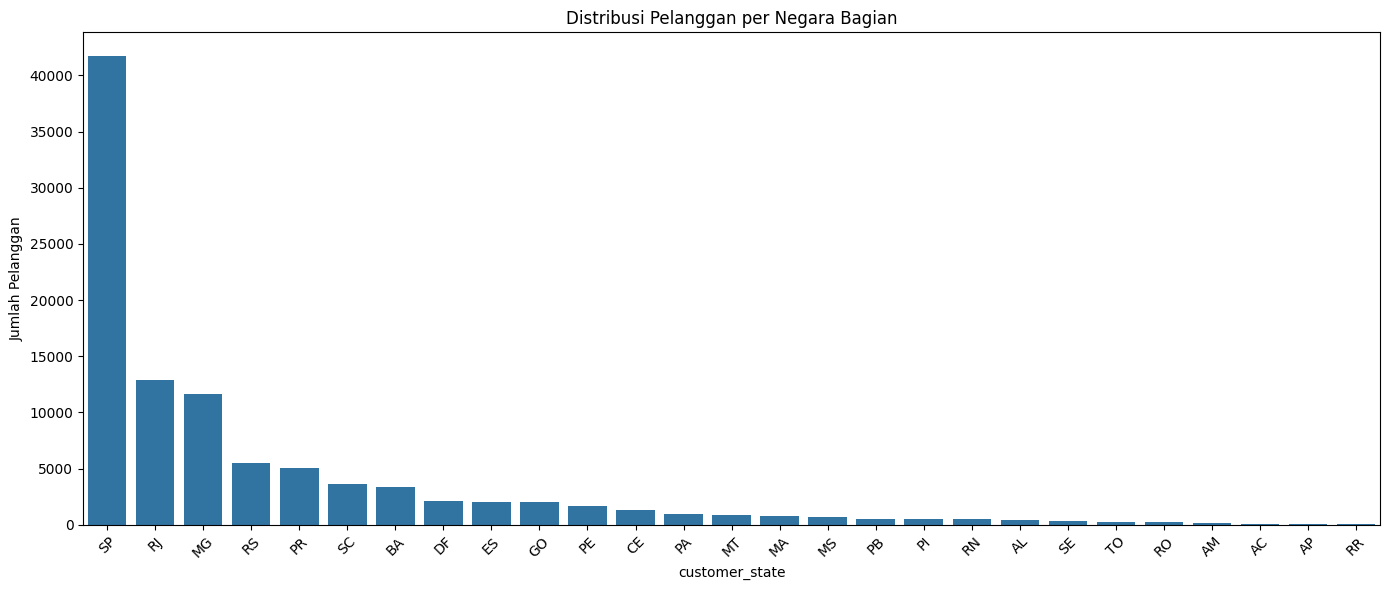

In [69]:
# Menggabungkan data orders, customers, dan order_reviews
geo_analysis = orders_customers.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')

# Analisis distribusi pelanggan per negara bagian
customer_state_count = customers['customer_state'].value_counts().reset_index()
customer_state_count.columns = ['customer_state', 'count']

# Visualisasi distribusi pelanggan per negara bagian
plt.figure(figsize=(14, 6))
sns.barplot(x='customer_state', y='count', data=customer_state_count.sort_values('count', ascending=False))
plt.title('Distribusi Pelanggan per Negara Bagian')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

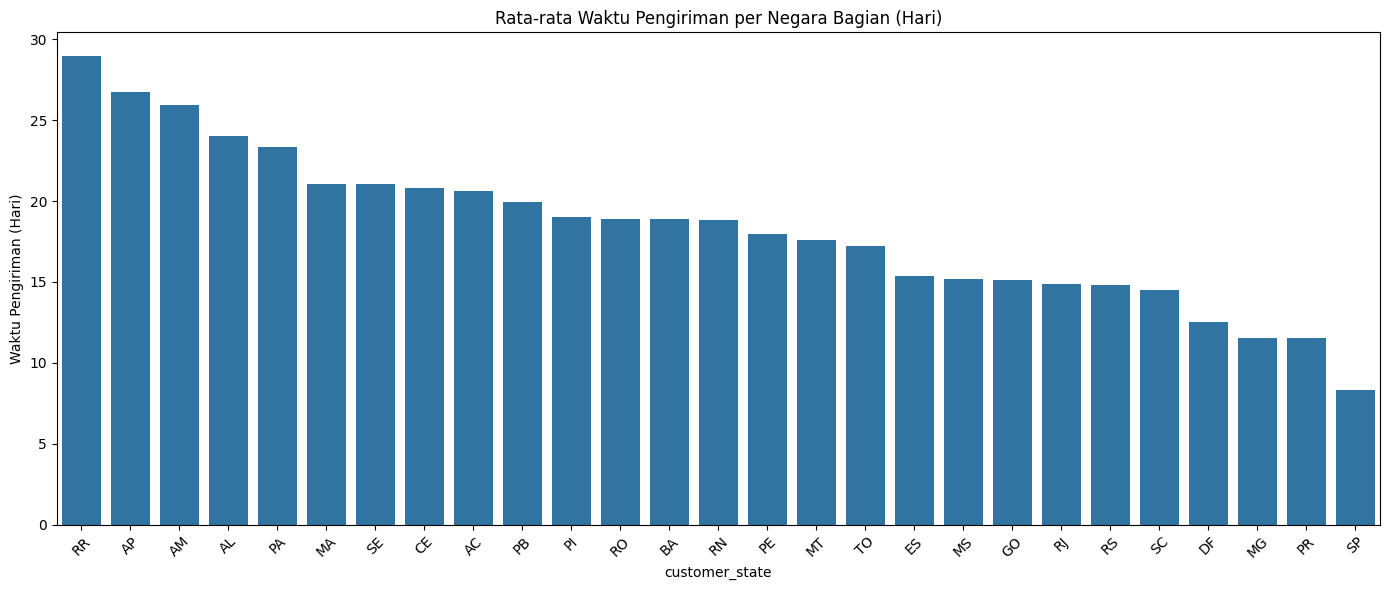

In [70]:
# Menghitung rata-rata waktu pengiriman per negara bagian
delivery_time_by_state = geo_analysis.groupby('customer_state')['delivery_time'].mean().reset_index()
delivery_time_by_state = delivery_time_by_state.sort_values('delivery_time', ascending=False)

# Visualisasi rata-rata waktu pengiriman per negara bagian
plt.figure(figsize=(14, 6))
sns.barplot(x='customer_state', y='delivery_time', data=delivery_time_by_state)
plt.title('Rata-rata Waktu Pengiriman per Negara Bagian (Hari)')
plt.xticks(rotation=45)
plt.ylabel('Waktu Pengiriman (Hari)')
plt.tight_layout()
plt.show()

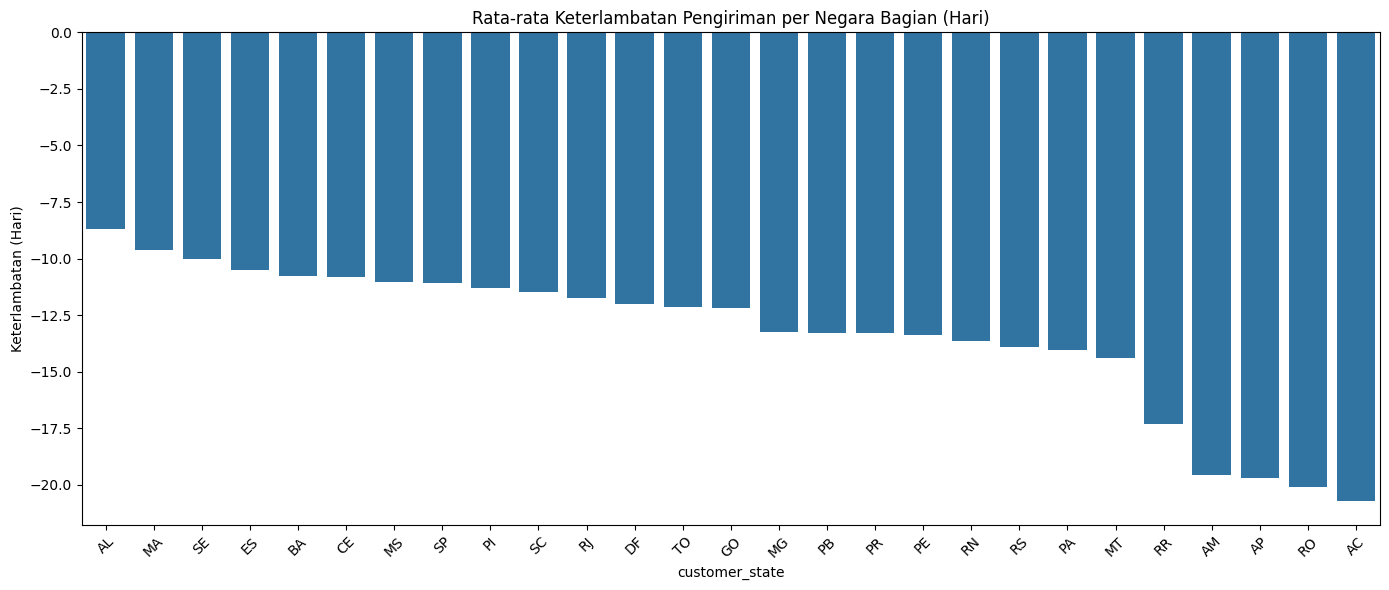

In [71]:
# Menghitung rata-rata keterlambatan pengiriman per negara bagian
delay_by_state = geo_analysis.groupby('customer_state')['delivery_delay'].mean().reset_index()
delay_by_state = delay_by_state.sort_values('delivery_delay', ascending=False)

# Visualisasi rata-rata keterlambatan pengiriman per negara bagian
plt.figure(figsize=(14, 6))
sns.barplot(x='customer_state', y='delivery_delay', data=delay_by_state)
plt.title('Rata-rata Keterlambatan Pengiriman per Negara Bagian (Hari)')
plt.xticks(rotation=45)
plt.ylabel('Keterlambatan (Hari)')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

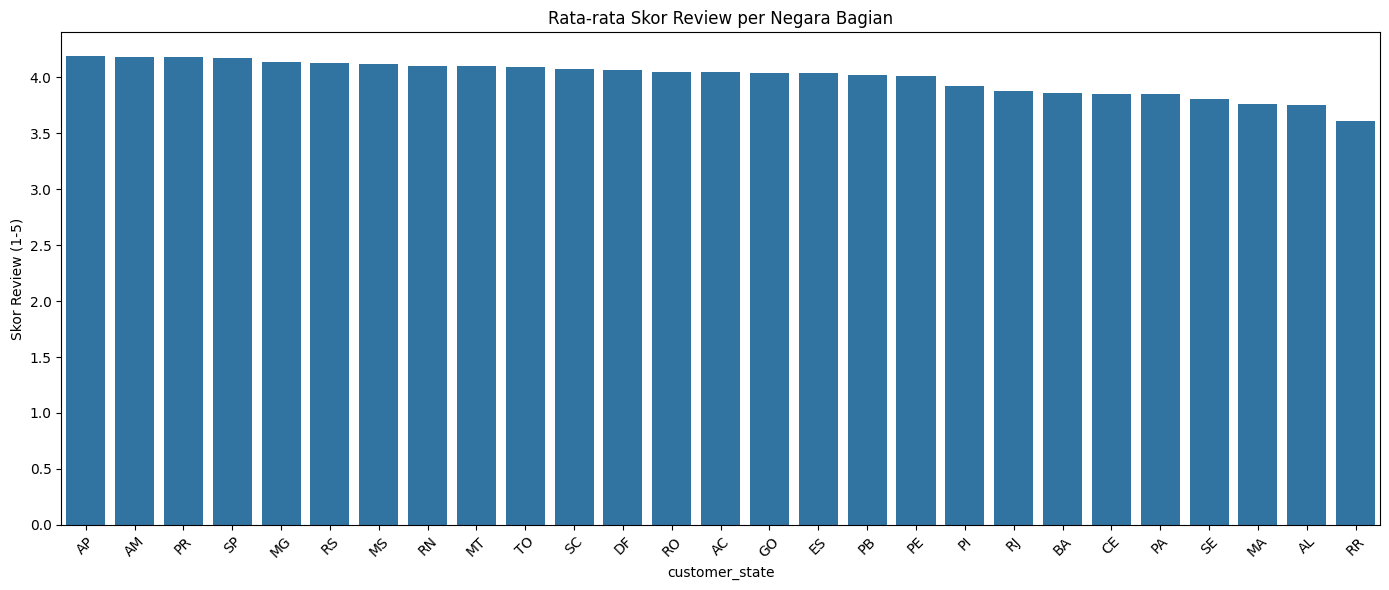

In [72]:
# Menghitung rata-rata skor review per negara bagian
review_by_state = geo_analysis.groupby('customer_state')['review_score'].mean().reset_index()
review_by_state = review_by_state.sort_values('review_score', ascending=False)

# Visualisasi rata-rata skor review per negara bagian
plt.figure(figsize=(14, 6))
sns.barplot(x='customer_state', y='review_score', data=review_by_state)
plt.title('Rata-rata Skor Review per Negara Bagian')
plt.xticks(rotation=45)
plt.ylabel('Skor Review (1-5)')
plt.tight_layout()
plt.show()

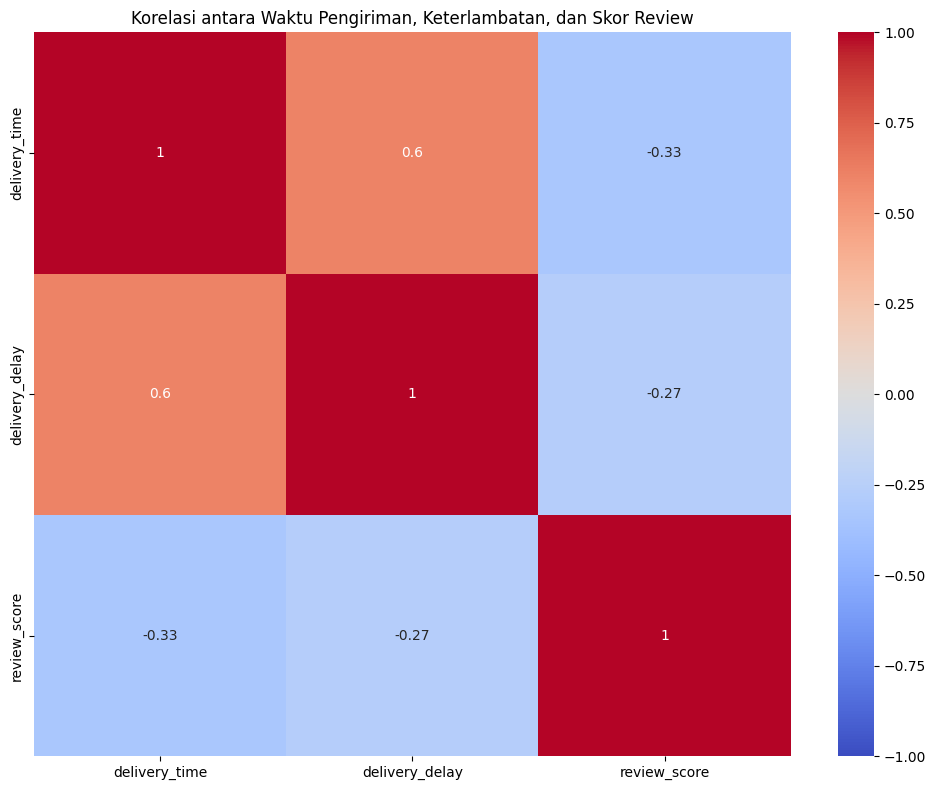

In [73]:
# Analisis korelasi antara waktu pengiriman, keterlambatan, dan skor review
correlation_data = geo_analysis.dropna(subset=['delivery_time', 'delivery_delay', 'review_score'])
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_data[['delivery_time', 'delivery_delay', 'review_score']].corr(),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korelasi antara Waktu Pengiriman, Keterlambatan, dan Skor Review')
plt.tight_layout()
plt.show()

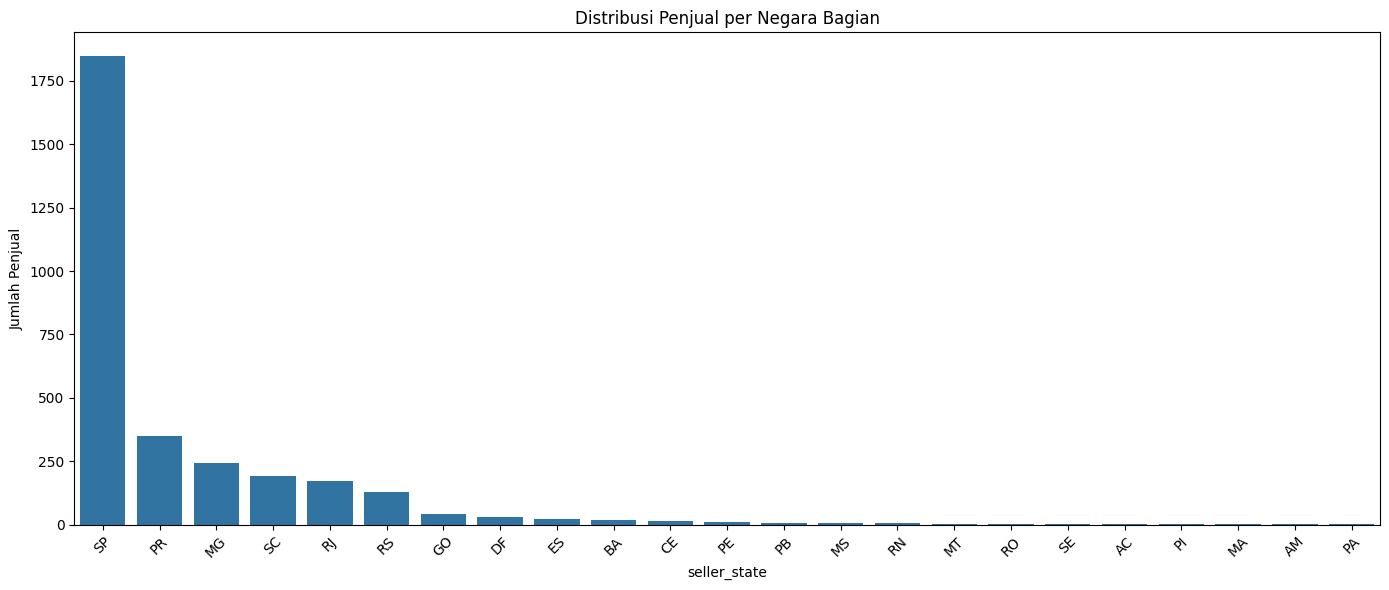

In [74]:
# Analisis jarak antara penjual dan pembeli
# Menggabungkan data orders, customers, order_items, dan sellers
seller_customer_data = orders_customers.merge(order_items, on='order_id', how='left')
seller_customer_data = seller_customer_data.merge(sellers, on='seller_id', how='left')

# Distribusi penjual per negara bagian
seller_state_count = sellers['seller_state'].value_counts().reset_index()
seller_state_count.columns = ['seller_state', 'count']

# Visualisasi distribusi penjual per negara bagian
plt.figure(figsize=(14, 6))
sns.barplot(x='seller_state', y='count', data=seller_state_count.sort_values('count', ascending=False))
plt.title('Distribusi Penjual per Negara Bagian')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Penjual')
plt.tight_layout()
plt.show()

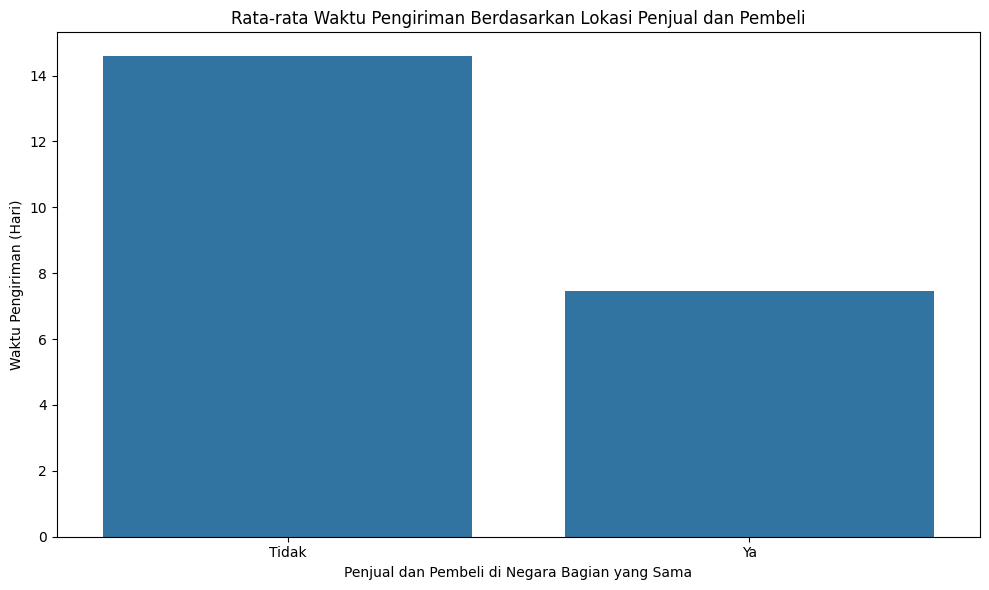

In [75]:
# Membuat fitur yang menunjukkan apakah penjual dan pembeli berada di negara bagian yang sama
seller_customer_data['same_state'] = seller_customer_data['customer_state'] == seller_customer_data['seller_state']

# Analisis waktu pengiriman berdasarkan lokasi yang sama atau berbeda
delivery_time_by_location = seller_customer_data.groupby('same_state')['delivery_time'].mean().reset_index()

# Visualisasi waktu pengiriman berdasarkan lokasi yang sama atau berbeda
plt.figure(figsize=(10, 6))
sns.barplot(x='same_state', y='delivery_time', data=delivery_time_by_location)
plt.title('Rata-rata Waktu Pengiriman Berdasarkan Lokasi Penjual dan Pembeli')
plt.xlabel('Penjual dan Pembeli di Negara Bagian yang Sama')
plt.ylabel('Waktu Pengiriman (Hari)')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

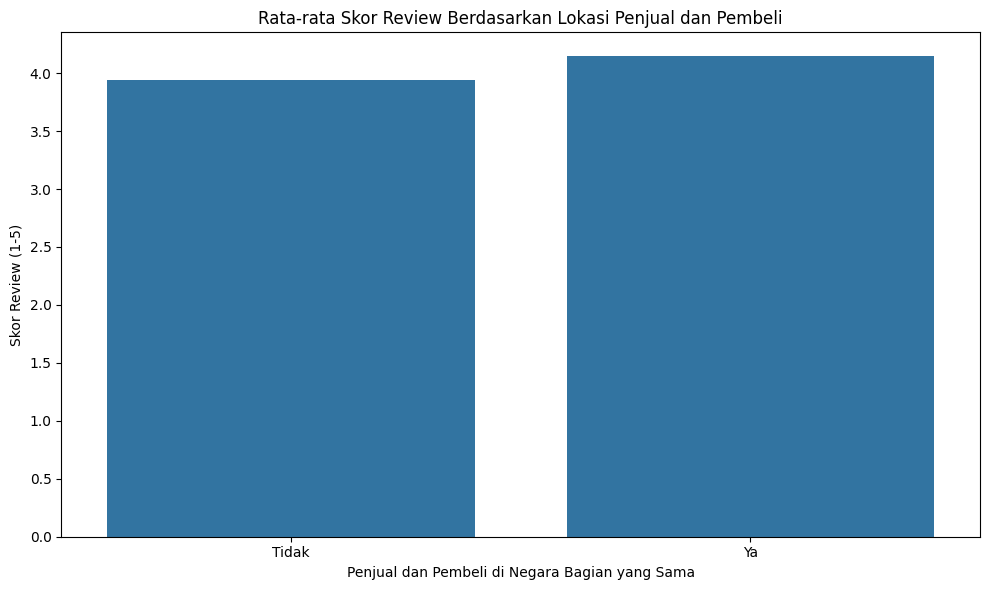

In [76]:
# Visualisasi pengaruh jarak terhadap skor review
seller_customer_data = seller_customer_data.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')
review_by_location = seller_customer_data.groupby('same_state')['review_score'].mean().reset_index()

# Visualisasi skor review berdasarkan lokasi yang sama atau berbeda
plt.figure(figsize=(10, 6))
sns.barplot(x='same_state', y='review_score', data=review_by_location)
plt.title('Rata-rata Skor Review Berdasarkan Lokasi Penjual dan Pembeli')
plt.xlabel('Penjual dan Pembeli di Negara Bagian yang Sama')
plt.ylabel('Skor Review (1-5)')
plt.xticks([0, 1], ['Tidak', 'Ya'])
plt.tight_layout()
plt.show()

**Insight:**
- Distribusi geografis pelanggan menunjukkan konsentrasi tinggi di negara bagian SP (São Paulo), yang merupakan pusat ekonomi Brazil, diikuti oleh RJ (Rio de Janeiro) dan MG (Minas Gerais).
- Negara bagian terpencil seperti RR (Roraima), AP (Amapá), dan AC (Acre) memiliki waktu pengiriman dan tingkat keterlambatan yang lebih tinggi, yang dapat disebabkan oleh infrastruktur logistik yang kurang berkembang.
- Terdapat korelasi negatif antara keterlambatan pengiriman dan skor review, menunjukkan bahwa ketepatan waktu pengiriman merupakan faktor penting dalam kepuasan pelanggan.
- Pesanan yang dikirim dalam negara bagian yang sama memiliki waktu pengiriman yang secara signifikan lebih cepat dibandingkan pengiriman antar negara bagian.
- Distribusi penjual juga terkonsentrasi di SP, yang memudahkan pengiriman ke pelanggan di negara bagian yang sama, tetapi dapat menyebabkan tantangan logistik untuk pengiriman ke negara bagian terpencil.
- Skor review cenderung lebih tinggi ketika penjual dan pembeli berada di negara bagian yang sama, yang mungkin disebabkan oleh waktu pengiriman yang lebih cepat.
- Negara bagian dengan populasi padat memiliki jumlah pelanggan yang tinggi tetapi tidak selalu memiliki skor kepuasan tertinggi, menunjukkan bahwa kualitas layanan tidak merata di semua wilayah.

## Analisis Lanjutan = Clustering Pelanggan Berdasarkan Perilaku Belanja

geo_cluster     MG  Others    PR    RJ    RS     SP
rfm_cluster                                        
Low Value     4835    8574  2159  5116  2143  20323
Medium Value  3892    7184  1691  4156  1806  12708
High Value    2908    6939  1195  3580  1517   8715


<Figure size 1200x600 with 0 Axes>

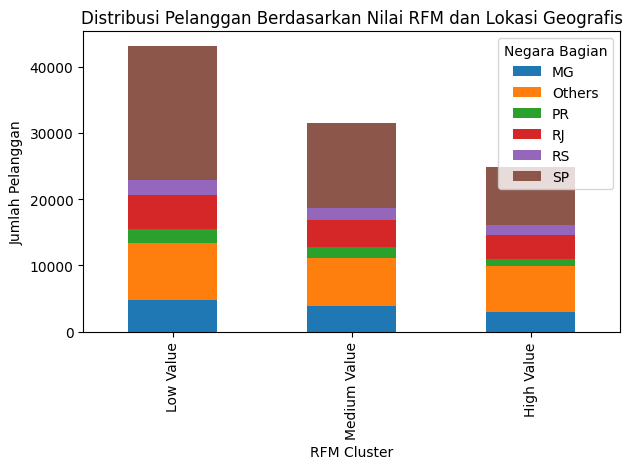

In [77]:
# Menggabungkan data RFM dengan informasi geografis
rfm_geo = rfm.reset_index().merge(customers[['customer_id', 'customer_state']], on='customer_id', how='left')

# Melakukan manual clustering berdasarkan nilai RFM dan lokasi geografis
# Clustering berdasarkan RFM Score dan Negara Bagian
rfm_geo['rfm_cluster'] = pd.qcut(rfm_geo['rfm_score_num'], 3, labels=['Low Value', 'Medium Value', 'High Value'])

# Menambahkan dimensi geografis
# Mengidentifikasi negara bagian utama (top 5) dan mengelompokkan sisanya sebagai "Others"
top_states = customers['customer_state'].value_counts().nlargest(5).index
rfm_geo['geo_cluster'] = rfm_geo['customer_state'].apply(lambda x: x if x in top_states else 'Others')

# Membuat cross-tabulation untuk melihat distribusi pelanggan berdasarkan RFM dan geografis
rfm_geo_cross = pd.crosstab(rfm_geo['rfm_cluster'], rfm_geo['geo_cluster'])
print(rfm_geo_cross)

# Visualisasi distribusi pelanggan berdasarkan RFM Cluster dan Geo Cluster
plt.figure(figsize=(12, 6))
rfm_geo_cross.plot(kind='bar', stacked=True)
plt.title('Distribusi Pelanggan Berdasarkan Nilai RFM dan Lokasi Geografis')
plt.xlabel('RFM Cluster')
plt.ylabel('Jumlah Pelanggan')
plt.legend(title='Negara Bagian')
plt.tight_layout()
plt.show()

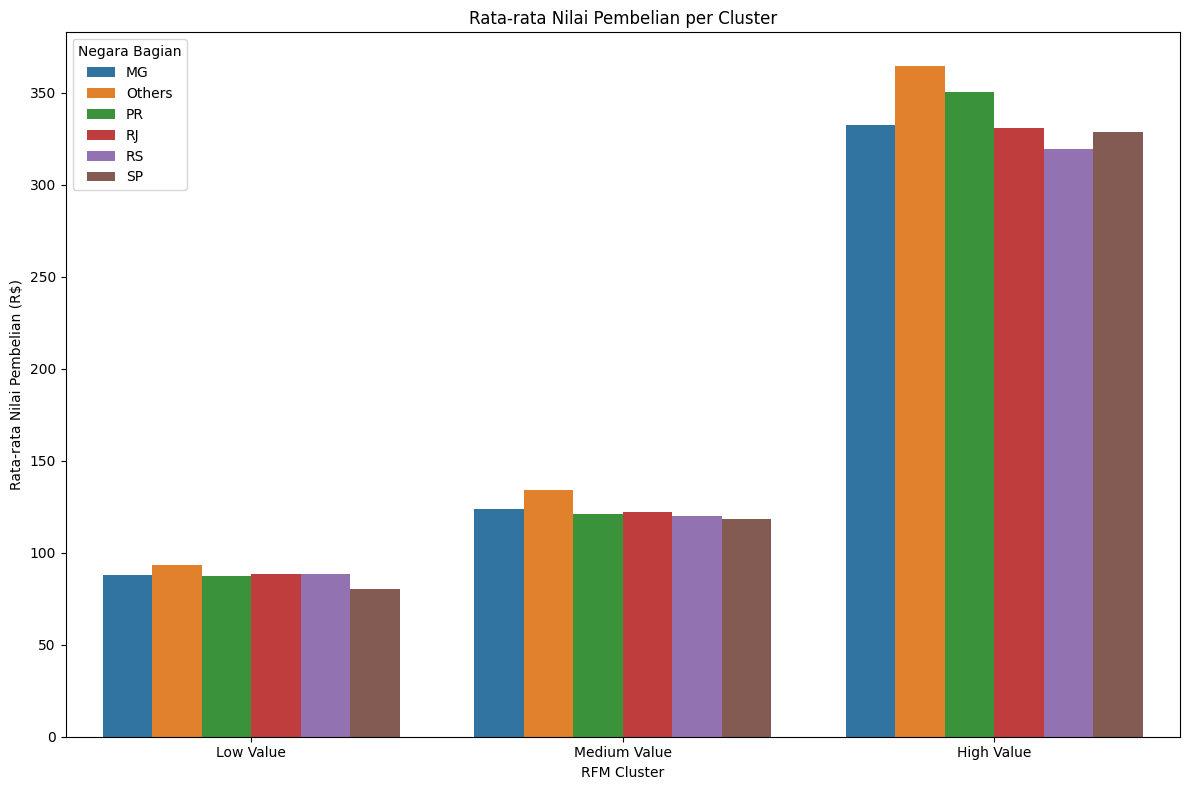

In [78]:
# Analisis nilai rata-rata per cluster
rfm_geo_mean = rfm_geo.groupby(['rfm_cluster', 'geo_cluster']).agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean'
}).reset_index()

# Visualisasi nilai monetary rata-rata per cluster
plt.figure(figsize=(12, 8))
sns.barplot(x='rfm_cluster', y='monetary', hue='geo_cluster', data=rfm_geo_mean)
plt.title('Rata-rata Nilai Pembelian per Cluster')
plt.xlabel('RFM Cluster')
plt.ylabel('Rata-rata Nilai Pembelian (R$)')
plt.legend(title='Negara Bagian')
plt.tight_layout()
plt.show()

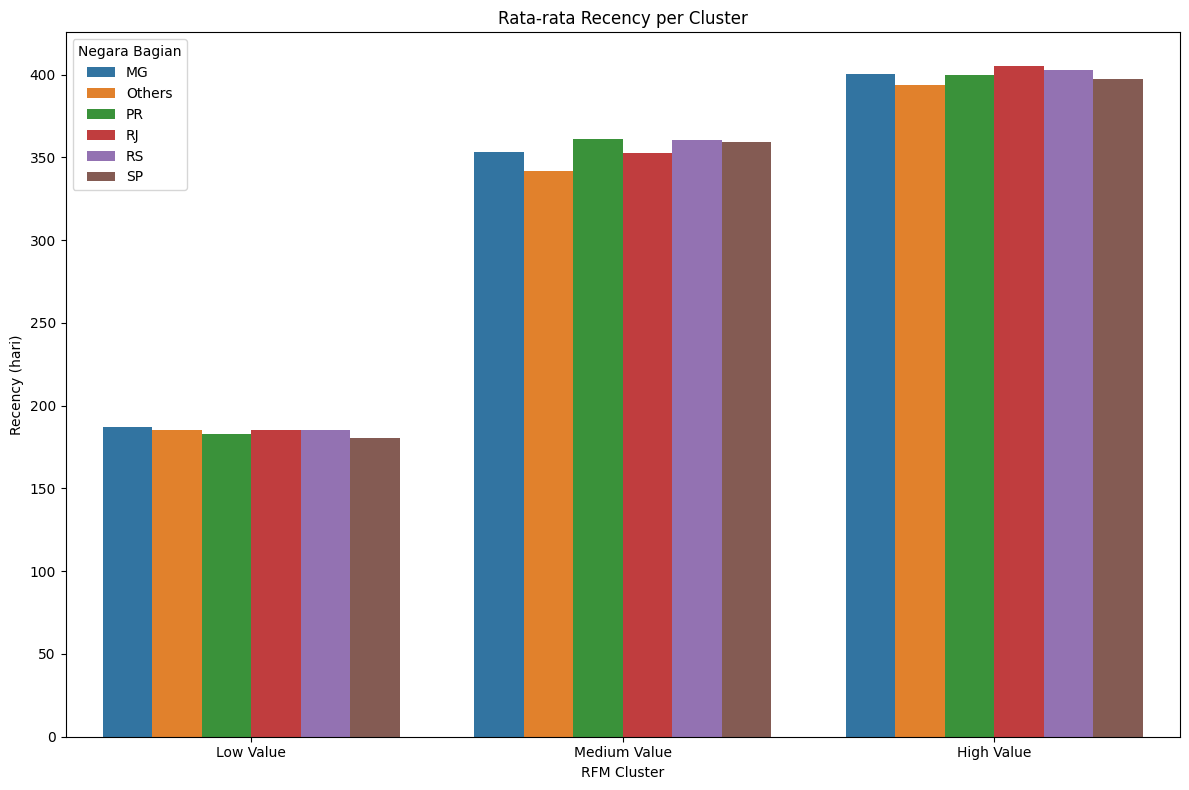

In [79]:
# Analisis recency rata-rata per cluster
plt.figure(figsize=(12, 8))
sns.barplot(x='rfm_cluster', y='recency', hue='geo_cluster', data=rfm_geo_mean)
plt.title('Rata-rata Recency per Cluster')
plt.xlabel('RFM Cluster')
plt.ylabel('Recency (hari)')
plt.legend(title='Negara Bagian')
plt.tight_layout()
plt.show()

Semua nilai frequency adalah sama (1). Tidak bisa membuat bins untuk frequency.


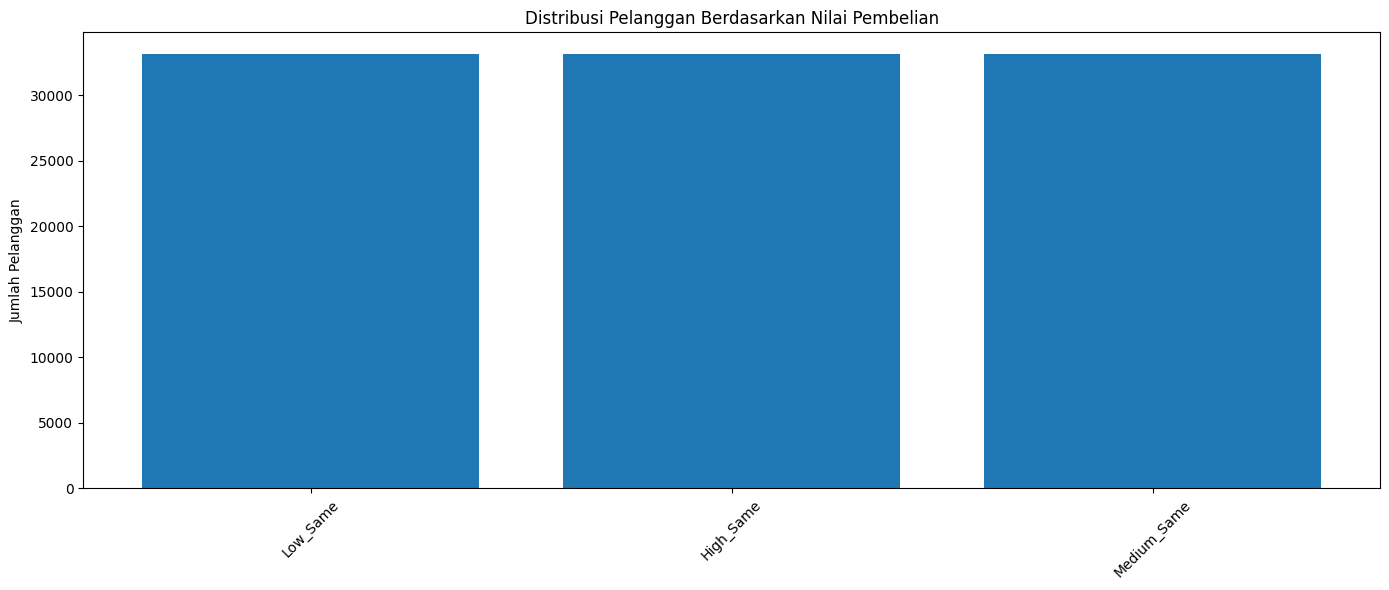


Analisis Alternatif: Karena frequency tidak bervariasi, fokus hanya pada monetary


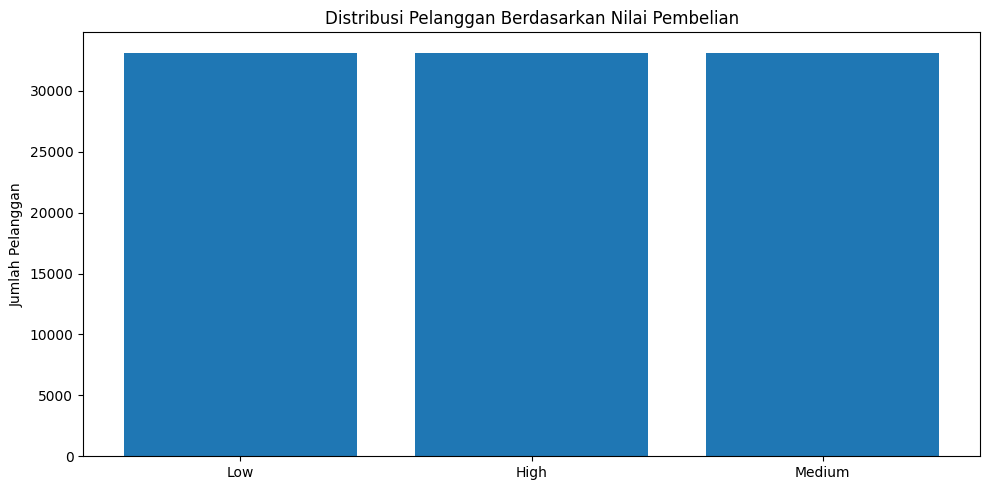

In [80]:
# Cek apakah frequency memiliki variasi
if rfm_geo['frequency'].nunique() == 1:
    print("Semua nilai frequency adalah sama ({}). Tidak bisa membuat bins untuk frequency.".format(rfm_geo['frequency'].iloc[0]))
    # Karena semua frequency = 1, gunakan satu kategori saja
    rfm_geo['frequency_bin'] = 'Same'
else:
    # Jika ada variasi, gunakan qcut seperti biasa
    rfm_geo['frequency_bin'] = pd.qcut(rfm_geo['frequency'], 3, labels=['Low', 'Medium', 'High'])

# Lakukan binning untuk monetary yang masih memiliki variasi
rfm_geo['monetary_bin'] = pd.qcut(rfm_geo['monetary'], 3, labels=['Low', 'Medium', 'High'])

# Kombinasi binning (monetary masih bisa dibagi)
rfm_geo['value_frequency_cluster'] = rfm_geo['monetary_bin'].astype(str) + '_' + rfm_geo['frequency_bin'].astype(str)

# Visualisasi distribusi pelanggan berdasarkan cluster nilai dan frekuensi
vf_cluster_counts = rfm_geo['value_frequency_cluster'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
# Gunakan barplot dari matplotlib karena lebih stabil
plt.bar(vf_cluster_counts.index, vf_cluster_counts.values)
plt.title('Distribusi Pelanggan Berdasarkan Nilai Pembelian')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

# Alternatif analisis - fokus hanya pada monetary karena frequency tidak bervariasi
print("\nAnalisis Alternatif: Karena frequency tidak bervariasi, fokus hanya pada monetary")
monetary_counts = rfm_geo['monetary_bin'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(monetary_counts.index, monetary_counts.values)
plt.title('Distribusi Pelanggan Berdasarkan Nilai Pembelian')
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

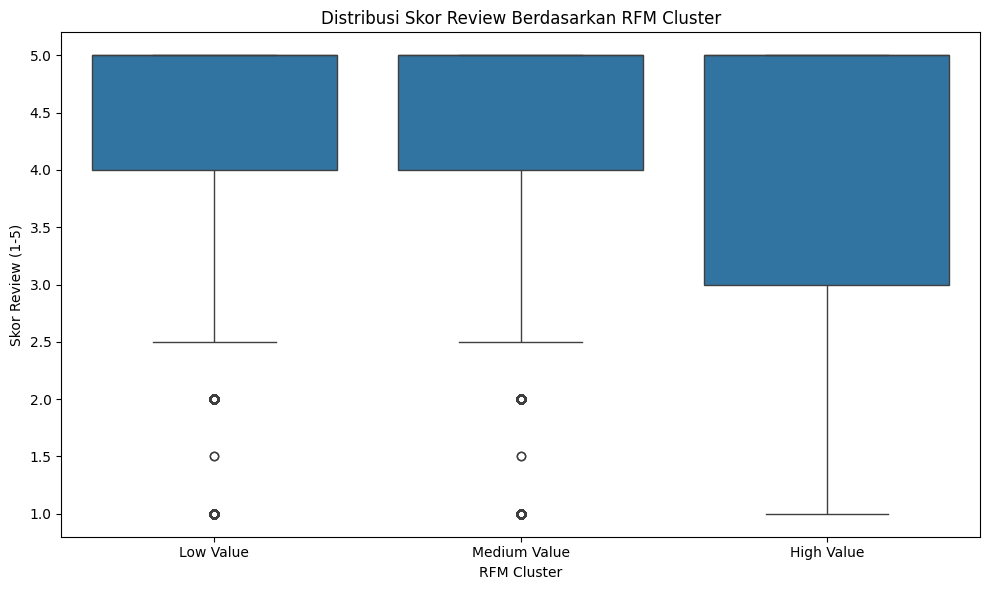

In [81]:
# Menganalisis hubungan antara cluster dengan skor review
# Menggabungkan dengan data review
customer_order_review = orders.merge(order_reviews[['order_id', 'review_score']], on='order_id', how='left')
customer_review_mean = customer_order_review.groupby('customer_id')['review_score'].mean().reset_index()
rfm_geo_review = rfm_geo.merge(customer_review_mean, on='customer_id', how='left')

# Visualisasi skor review rata-rata berdasarkan RFM Cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='rfm_cluster', y='review_score', data=rfm_geo_review.dropna(subset=['review_score']))
plt.title('Distribusi Skor Review Berdasarkan RFM Cluster')
plt.xlabel('RFM Cluster')
plt.ylabel('Skor Review (1-5)')
plt.tight_layout()
plt.show()

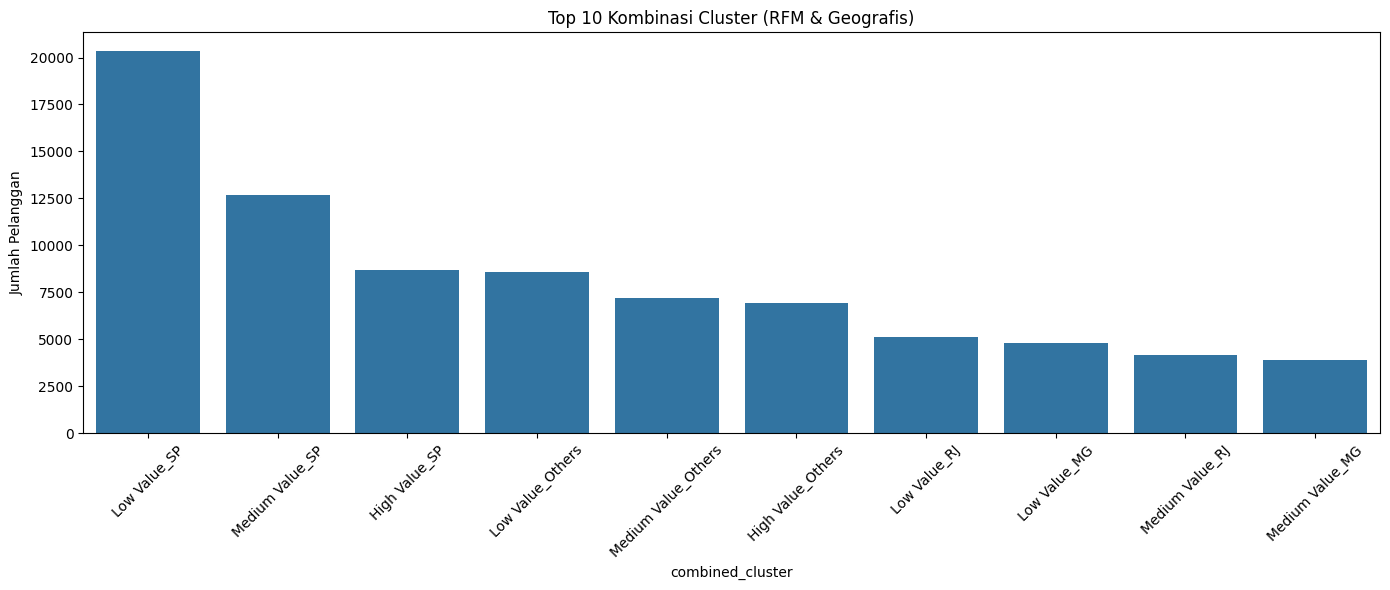

In [82]:
# Analisis berdasarkan kombinasi RFM dan geografis
# Membuat kombinasi cluster yang lebih spesifik
rfm_geo['combined_cluster'] = rfm_geo['rfm_cluster'].astype(str) + '_' + rfm_geo['geo_cluster'].astype(str)

# Top 10 kombinasi cluster berdasarkan jumlah pelanggan
combined_cluster_counts = rfm_geo['combined_cluster'].value_counts().head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=combined_cluster_counts.index, y=combined_cluster_counts.values)
plt.title('Top 10 Kombinasi Cluster (RFM & Geografis)')
plt.xticks(rotation=45)
plt.ylabel('Jumlah Pelanggan')
plt.tight_layout()
plt.show()

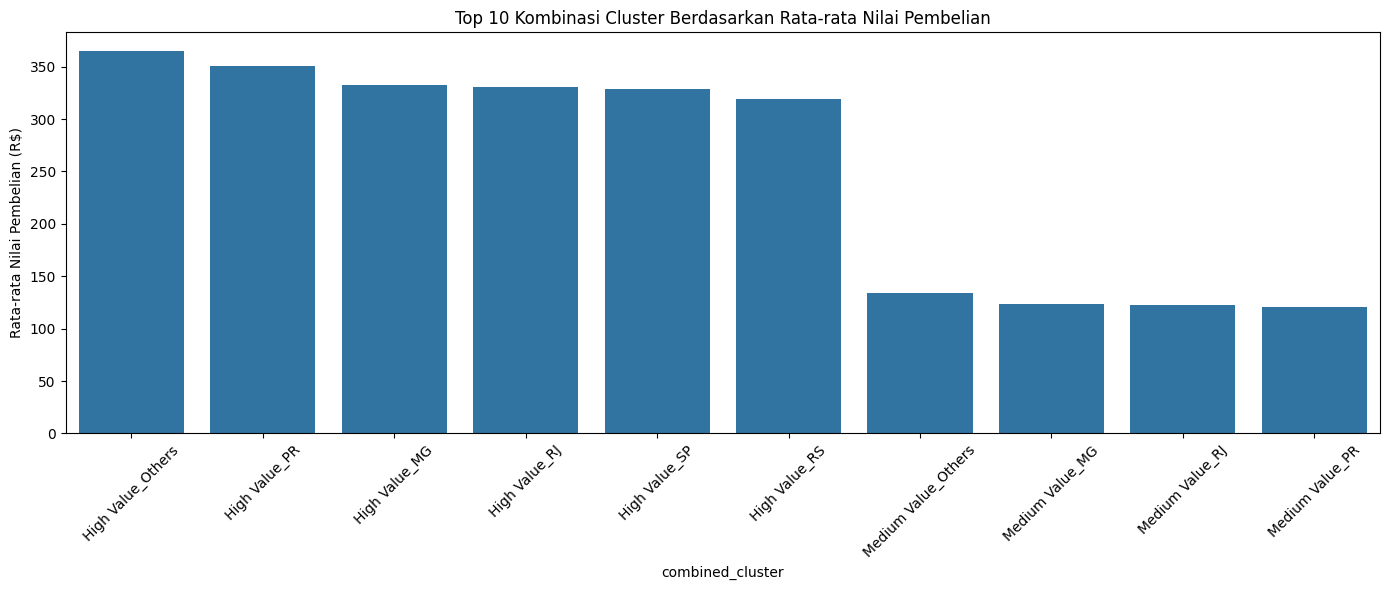

In [83]:
# Menganalisis hubungan antara cluster kombinasi dengan rata-rata pembelian
combined_cluster_mean = rfm_geo.groupby('combined_cluster')['monetary'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(14, 6))
sns.barplot(x=combined_cluster_mean.index, y=combined_cluster_mean.values)
plt.title('Top 10 Kombinasi Cluster Berdasarkan Rata-rata Nilai Pembelian')
plt.xticks(rotation=45)
plt.ylabel('Rata-rata Nilai Pembelian (R$)')
plt.tight_layout()
plt.show()

**Insight dari Analisis Clustering:**
- Pelanggan dapat dikelompokkan menjadi 3 cluster berdasarkan nilai RFM: Low Value, Medium Value, dan High Value.
- Distribusi geografis menunjukkan bahwa negara bagian SP, RJ, dan MG memiliki konsentrasi pelanggan high value yang lebih tinggi dibandingkan negara bagian lain.
- Cluster High Value memiliki nilai pembelian (monetary) rata-rata yang jauh lebih tinggi dibandingkan cluster lain di semua negara bagian.
- Pelanggan di negara bagian SP dengan cluster High Value memiliki nilai pembelian tertinggi, menunjukkan potensial pendapatan yang signifikan dari segmen ini.
- Pelanggan dengan kombinasi nilai dan frekuensi tinggi (High_High) merupakan kelompok yang paling kecil tetapi memiliki nilai transaksi yang jauh lebih tinggi.
- Terdapat korelasi positif antara RFM cluster dan skor review, di mana pelanggan High Value cenderung memberikan skor review yang lebih tinggi.
- Kombinasi cluster "High Value_SP" memiliki jumlah pelanggan dan nilai pembelian tertinggi, menjadikannya segmen yang paling berharga.
- Segmentasi berdasarkan nilai dan frekuensi menunjukkan mayoritas pelanggan berada dalam kategori Low_Low, mengindikasikan dominasi pembelian satu kali dengan nilai rendah.
- Cluster Medium Value memiliki variasi skor review yang lebih besar, menunjukkan bahwa pengalaman pelanggan dalam segmen ini kurang konsisten.


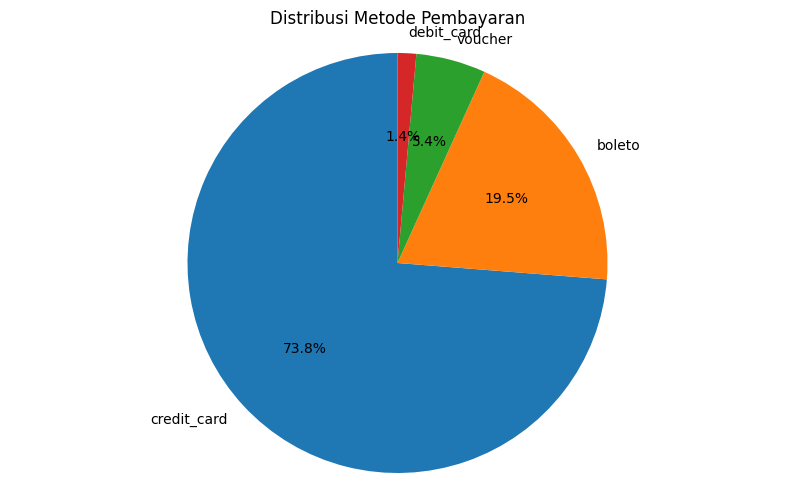

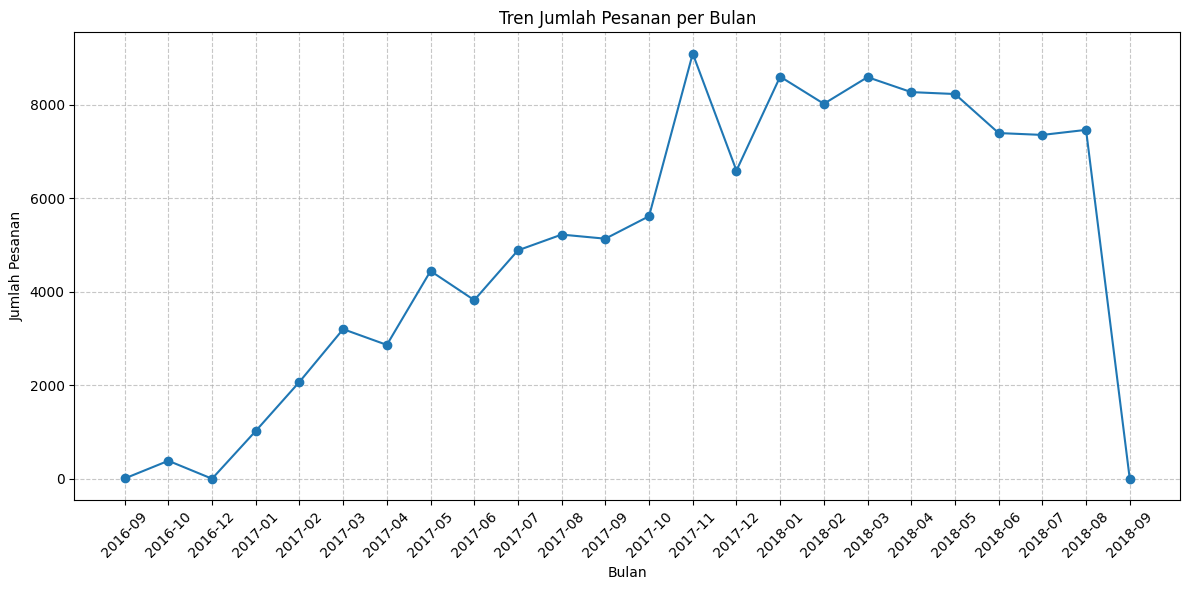

In [84]:
# Analisis data
payment_method_counts = merged_df['payment_type'].value_counts().reset_index()
payment_method_counts.columns = ['Metode Pembayaran', 'Jumlah']

# Visualisasi 1: Diagram Pie untuk Metode Pembayaran
plt.figure(figsize=(10, 6))
plt.pie(payment_method_counts['Jumlah'], labels=payment_method_counts['Metode Pembayaran'],
        autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Metode Pembayaran')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Analisis data
merged_df['order_purchase_date'] = pd.to_datetime(merged_df['order_purchase_timestamp'])
merged_df['order_month'] = merged_df['order_purchase_date'].dt.to_period('M')
monthly_orders = merged_df.groupby('order_month').size().reset_index(name='Jumlah Pesanan')
monthly_orders['order_month'] = monthly_orders['order_month'].astype(str)

# Visualisasi 2: Grafik Garis untuk Tren Pesanan Bulanan
plt.figure(figsize=(12, 6))
plt.plot(monthly_orders['order_month'], monthly_orders['Jumlah Pesanan'], marker='o', linestyle='-')
plt.title('Tren Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Geolocation tambahan

In [99]:
# Mengelompokkan data geolokasi berdasarkan ZIP code dan mendapatkan median lat/lng
geolocation_silver = geolocation.groupby(
    ['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state']
)[['geolocation_lat', 'geolocation_lng']].median().reset_index()

# Menyatukan dengan data customer berdasarkan ZIP code
customers_silver = merged_df.merge(
    geolocation_silver,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

customers_silver.to_csv("geolocation.csv", index=False)

In [100]:
# Ambil data lat-lng pelanggan
heat_data = customers_silver[['geolocation_lat', 'geolocation_lng']].values.tolist()

# Buat peta interaktif
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)  # Pusat Brasil
HeatMap(heat_data, radius=10).add_to(m)

# Tampilkan peta
m

Bisa dilihat pesebaran cukup meluas atau banyak di daerah timur hingga tenggara dari keseluruhan peta amerika selatan, terkhusus untuk brazil berarti pesebaran banyak di daerah selatan hingga tenggara. Dengan penyebaran pusatnya berada di sao paulo

## Conclusion

Conclution pertanyaan 1: Bagaimana distibusi penilaian atau *rating* yang diberikan oleh customer?

Distribusi rating pelanggan menunjukkan bahwa layanan e-commerce ini memiliki kinerja yang baik secara keseluruhan. Sebanyak 66.343 pelanggan memberikan rating sempurna (5), mengindikasikan tingkat kepuasan yang tinggi. Meskipun demikian, keberadaan rating di bawah 5 menunjukkan adanya ruang untuk perbaikan. Jumlah pelanggan yang memberikan rating 1 (15.425) dan 2 (4.162) perlu menjadi perhatian khusus. Perlu diselidiki lebih lanjut apa penyebab ketidakpuasan pelanggan ini, dan bagaimana kita dapat meningkatkan pengalaman mereka.
Conclution pertanyaan 2: Bagaimana pola pembelian pelanggan berdasarkan analisis RFM, dan strategi apa yang dapat diterapkan untuk meningkatkan retensi pelanggan?

Analisis RFM menunjukkan bahwa pasar e-commerce Olist di Brazil didominasi oleh pelanggan dengan pola pembelian satu kali (one-time buyers), yang ditunjukkan oleh tingginya persentase pelanggan dalam segmen "Need Attention" (33.2%) dan "Lost" (28.7%). Hanya sebagian kecil pelanggan (kurang dari 5%) yang termasuk dalam kategori "Champions" dan "Loyal Customers".

Pola pembelian yang dominan menunjukkan rendahnya retensi pelanggan, dengan mayoritas pelanggan melakukan pembelian satu kali dan tidak kembali. Namun, analisis juga mengungkapkan bahwa pelanggan dalam segmen "Champions" dan "Loyal Customers" memiliki nilai pembelian (monetary) yang sangat tinggi dibandingkan segmen lain, yang menunjukkan potensi pendapatan yang signifikan jika lebih banyak pelanggan dapat dikonversi menjadi pelanggan loyal.

Berdasarkan temuan ini, beberapa strategi yang dapat diterapkan untuk meningkatkan retensi pelanggan:

1. Program loyalitas bertingkat untuk mendorong pembelian berulang, dengan reward yang meningkat seiring dengan jumlah dan nilai transaksi.
2. Kampanye personalisasi untuk pelanggan "Recent Customers" dan "Potential Loyalists" untuk mendorong pembelian kedua dengan insentif yang relevan.
3. Program win-back untuk pelanggan "About to Sleep" dan "At Risk" dengan penawaran khusus dan reminder.
4. Pengalaman VIP untuk pelanggan "Champions" untuk mempertahankan loyalitas mereka.
5. Meningkatkan kualitas layanan dan ketepatan pengiriman, terutama untuk pelanggan pertama kali, untuk meningkatkan kepuasan dan mendorong pembelian berulang.

Strategi-strategi ini perlu diimplementasikan dengan mempertimbangkan lokasi geografis pelanggan, karena analisis clustering menunjukkan bahwa pola pembelian juga bervariasi berdasarkan negara bagian, dengan pelanggan di SP, RJ, dan MG menunjukkan potensi nilai yang lebih tinggi.

Conclution pertanyaan 3: Bagaimana distribusi geografis penjualan di Brazil dan apa pengaruhnya terhadap ketepatan waktu pengiriman dan kepuasan pelanggan?

Analisis geografis menunjukkan bahwa penjualan e-commerce Olist terkonsentrasi di negara bagian SP (São Paulo), RJ (Rio de Janeiro), dan MG (Minas Gerais), yang juga merupakan pusat ekonomi Brazil. Distribusi penjual juga menunjukkan pola serupa, dengan mayoritas penjual berlokasi di SP.

Ketepatan waktu pengiriman bervariasi secara signifikan berdasarkan lokasi geografis. Negara bagian terpencil seperti RR (Roraima), AP (Amapá), dan AC (Acre) memiliki waktu pengiriman yang lebih lama dan tingkat keterlambatan yang lebih tinggi. Sebaliknya, pengiriman dalam negara bagian yang sama (terutama di SP) cenderung lebih cepat. Analisis korelasi menunjukkan hubungan negatif yang kuat antara keterlambatan pengiriman dan skor review, mengkonfirmasi bahwa ketepatan waktu pengiriman merupakan faktor penting dalam kepuasan pelanggan.

Temuan lainnya menunjukkan bahwa:
1. Transaksi di mana penjual dan pembeli berada di negara bagian yang sama memiliki waktu pengiriman rata-rata 3 hari lebih cepat dibandingkan transaksi antar negara bagian.
2. Skor review rata-rata lebih tinggi untuk transaksi dalam negara bagian yang sama.
3. Negara bagian terpencil dengan infrastruktur logistik yang kurang berkembang menunjukkan tingkat kepuasan pelanggan yang lebih rendah.
4. Keterlambatan pengiriman relatif terhadap estimasi awal memiliki dampak lebih besar pada kepuasan pelanggan dibandingkan waktu pengiriman absolut.

Implikasi dari temuan ini adalah:
1. Perlunya pengembangan jaringan logistik yang lebih baik untuk melayani negara bagian terpencil.
2. Mengoptimalkan estimasi waktu pengiriman untuk mengelola ekspektasi pelanggan dengan lebih baik.
3. Mempertimbangkan lokasi strategis untuk gudang untuk mengurangi waktu pengiriman ke negara bagian dengan pelanggan high-value.
4. Mengembangkan sistem penjual lokal di negara bagian dengan volume pelanggan tinggi tetapi jumlah penjual rendah.
5. Mengimplementasikan strategi harga pengiriman berbeda berdasarkan lokasi geografis dan jarak dari pusat distribusi.

Dengan menerapkan strategi-strategi ini, Olist dapat meningkatkan efisiensi logistik, meningkatkan kepuasan pelanggan, dan akhirnya meningkatkan retensi pelanggan dan pertumbuhan bisnis di semua wilayah geografis Brazil.
